# 병원 폐업 예측모델 만들기


### 배경
-  기존의 금융기관은 일반적으로 병원 대출 시 신용점수 또는 담보물 위주의 평가
- 재무제표 분석을 통해 **상환 기간 동안의 계속 경영 여부를 예측**하여 신용 점수가 낮거나 담보를 가지지 못하는 우수 병원들에게 금융 기회를 제공하려 함

### 데이터 
[DACON_연습용 데이터](https://dacon.io/competitions/official/9565/overview/description)

- train.csv : 의료기관 폐업여부 포함 최근 2개년 재무정보와 병원 기본정보
- test.csv : 폐업여부 제외


## 데이터 소개(column)


```
inst_id - 각 파일에서의 병원 고유 번호
OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함
sido – 병원의 광역 지역 정보
sgg – 병원의 시군구 자료
openDate – 병원 설립일
bedCount - 병원이 갖추고 있는 병상의 수
instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류
·        종합병원 : 입원환자 100명 이상 수용 가능
·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능
·        의원 : 입원 환자 30명 이하 수용 가능
·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  
revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함
salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함
sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함
salary1 – 급여, 2017(회계년도)년 데이터를 의미함
noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함
noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함
Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함
ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함
Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함
liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함
quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함
receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함
inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함
nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함
tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함
OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함
receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함
debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함
liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함
shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함
NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함
longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함
netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함
surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함
---
revenue2 – 매출액, 2016(회계년도)년 데이터를 의미함
salescost2 – 매출원가, 2016(회계년도)년 데이터를 의미함
sga2 - 판매비와 관리비, 2016(회계년도)년 데이터를 의미함
salary2 – 급여, 2016(회계년도)년 데이터를 의미함
noi2 – 영업외수익, 2016(회계년도)년 데이터를 의미함
noe2 – 영업외비용, 2016(회계년도)년 데이터를 의미함
interest2 – 이자비용, 2016(회계년도)년 데이터를 의미함
ctax2 – 법인세비용, 2016(회계년도)년 데이터를 의미함
profit2 – 당기순이익, 2016(회계년도)년 데이터를 의미함
liquidAsset2 – 유동자산, 2016(회계년도)년 데이터를 의미함
quickAsset2 – 당좌자산, 2016(회계년도)년 데이터를 의미함
receivableS2 - 미수금(단기), 2016(회계년도)년 데이터를 의미함
inventoryAsset2 – 재고자산, 2016(회계년도)년 데이터를 의미함
nonCAsset2 – 비유동자산, 2016(회계년도)년 데이터를 의미함
tanAsset2 – 유형자산, 2016(회계년도)년 데이터를 의미함
OnonCAsset2 - 기타 비유동자산, 2016(회계년도)년 데이터를 의미함
receivableL2 – 장기미수금, 2016(회계년도)년 데이터를 의미함
Debt2 – 부채총계, 2016(회계년도)년 데이터를 의미함
liquidLiabilities2 – 유동부채, 2016(회계년도)년 데이터를 의미함
shortLoan2 – 단기차입금, 2016(회계년도)년 데이터를 의미함
NCLiabilities2 – 비유동부채, 2016(회계년도)년 데이터를 의미함
longLoan2 – 장기차입금, 2016(회계년도)년 데이터를 의미함
netAsset2 – 순자산총계, 2016(회계년도)년 데이터를 의미함
surplus2 – 이익잉여금, 2016(회계년도)년 데이터를 의미함
employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함
employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함
ownerChange – 대표자의 변동 

```

### [참고] 데이터 관련 정보


손익계산서
- 매출액(a) : 얼마나 팔았나
- 매출원가(b) : 판매를 위한 물건의 가격
- 매출총이익(a-b)
- 매출총이익률 = 매출총이익/매출액

- 영업이익 : 기업의 주된 영업활동으로 인해 발생한 이익
- 영업이익 = 매출총이익 - 비용(판관비+ 급여)

- 당기순이익 : 세금 포함 모든 비용 제외후 정말로 남은 돈(순수이익) 
- 당기순이익 = 영업이익 - (영업외손익 + 이자비용 + 법인세비용) 


재무상태표
* 자산 = 부채 + 자본
- 자산 
    - 유동자산 : 현금, 매출채권(외상), 재고자산
    - 비유동 자산 : 유형자산, 무형자산
- 부채 
    - 유동부채 : 매입채무(외상), 단기차입금
    - 비유동부채 : 장기차입금
- 자본
    - 자본금(동업자들이 투자한 돈)
    - 이익잉여금(배당 및 채무탕감 후 남은 돈)

- ROE : (부채제외) 투자 금액으로 얼마만큼의 이익을 발생시켰는지 
    - ROE(Return on Equity, 자기자본이익률) = 당기순이익/자기자본
        - 자기자본 = 순자산
- ROA : 이익 창출을 위해 자산을 얼마나 활용했는지 
    - ROA(Return on Assets, 총자산이익률) = 당기순이익/총자산
- Debt_ratio(부채비율) : 총자산에 비례한 부채의 비율, 레버리지 관리 역량의 측정 수단
    - Debt_ratio = 부채(유동성+장기부채)/총자산


## 가설 설정 


``` 
1. 매출총이익률 높을수록 폐업률 낮을 것이다.
```

``` 
2. 영업이익이 높을수록/당기순이익이 높을수록 폐업률 낮을 것이다.
```
``` 
3. 영업이익이 높은데 당기순이익이 낮다면 부채가 많아 이자비용이 많이 발생하는 것 ==> 둘의 관계 살펴보고 반대 방향이면 폐업률 높을 것이다.
```
```
4. ROE/ROA 높을수록 폐업률 낮을 것이다.
```
```
5. "총자산(순자산+ 부채총계)/순자산" 이 높고 ROE 낮다면 폐업률 높을 것이다. 
```
```
6. ownerChange == True 일수록 폐업률 높을 것이다.
```
```
7. 병원 종류, 지역에 따른 차이 여부
```

## 데이터 분석

### 라이브러리

In [ ]:
!pip install category_encoders
!pip install shap    # shap : feature attribution 계산
!pip install pdpbox  # pdp(partial dependence plot) : 특성-타겟 어떻게 영향 미치는지 

     |████████████████████████████████| 86 kB 805 kB/s 
     |████████████████████████████████| 564 kB 5.3 MB/s 
     |████████████████████████████████| 34.0 MB 2.9 MB/s 
     |████████████████████████████████| 13.1 MB 7.8 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=093858173d138d5706421ab0bd2f291b5a59088cbbf5b239d2d3d67626aea566
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline 
from imblearn.pipeline import make_pipeline  #SMOTE 추가시 

import shap
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

# imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

# encoder
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder

# SMOTE
from imblearn.over_sampling import SMOTE, ADASYN

## model 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier



In [ ]:
!pip list | grep scikit-learn

scikit-learn                  1.0.2


### 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#os.mkdir('/content/drive/MyDrive/hospital')

In [ ]:
cd '/content/drive/MyDrive/hospital'

/content/drive/MyDrive/hospital


In [ ]:
#!unzip -qq '/content/drive/MyDrive/9565_hospital_data.zip'  

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/hospital/train.csv')
test = pd.read_csv('/content/drive/MyDrive/hospital/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/hospital/submission_sample.csv')
#submission.head()

In [ ]:
print(train.shape, test.shape)  # 데이터의 갯수 적음  

(301, 58) (127, 58)


In [ ]:
#train.info()

In [ ]:
#test.info()

#### test - column type 변경
- employee.dtype == 'object' --> 'float'

In [ ]:
train[['employee1', 'employee2']]
test[['employee1', 'employee2']].describe()
test[['employee1', 'employee2']] = test[['employee1', 'employee2']].apply(lambda x: x.str.replace(',','').astype(float))
test[['employee1', 'employee2']]

,employee1,employee2
0,693.0,693.0
1,379.0,371.0
2,NaN,NaN
3,760.0,760.0
4,437.0,385.0
...,...,...
122,560.0,NaN
123,132.0,137.0
124,NaN,NaN
125,363.0,343.0


In [ ]:
#test.info()

## EDA 및 데이터 시각화
* feature, target 분포(balnce 유무 확인)
    - target 데이터 불균형 => oversampling ? 
* 결측치, 중복값 확인
* featrue 특징 파악
* feature engineering 
    - 카테고리 데이터 수치형으로 변경
    - 필요 칼럼 선택, 일부는 칼럼 생성
    - opendate - to_datetime
    - feature 간의 상관관계


In [ ]:
"""
사용 칼럼 
1. revenue - salescost = tot_profit(매출총이익)
2. (tot_profit/revenue)*100 = rat_profit(매출총이익률)
3. revenue - salescost - sga - salary = ope_profit(영업이익)
4. profit(당기순이익)
5. profit/netAsset = ROE
6. Debt + netAsset = tot_asset(총자산)
7. netAsset(순자산)
8. employee1/employee2 * 100 = 직원수 변동  or 직원수 (절대) 규모
9. ownerChnage
"""

'\n사용 칼럼 \n1. revenue - salescost = tot_profit(매출총이익)\n2. (tot_profit/revenue)*100 = rat_profit(매출총이익률)\n3. revenue - salescost - sga - salary = ope_profit(영업이익)\n4. profit(당기순이익)\n5. profit/netAsset = ROE\n6. Debt + netAsset = tot_asset(총자산)\n7. netAsset(순자산)\n8. employee1/employee2 * 100 = 직원수 변동  or 직원수 (절대) 규모\n9. ownerChnage\n'

### 카테고리 데이터 분포 및 타겟과의 관계 

In [ ]:
# 카테고리 데이터 특성 확인
train.describe(exclude = 'number').T.sort_values(by = 'unique')

,count,unique,top,freq
OC,301,2,open,286
ownerChange,289,2,same,247
instkind,300,7,nursing_hospital,144
sido,301,16,gyeonggi,49


In [ ]:
## 카테고리 데이터 분포 
#train.dtypes   #'sido', 'instkind', 'ownerChange', 'OC'
cat_col =['sido', 'instkind', 'ownerChange', 'OC']
for col in cat_col:
     print(f"{col} : # of unique = {train[col].nunique()}")

sido : # of unique = 16
instkind : # of unique = 7
ownerChange : # of unique = 2
OC : # of unique = 2


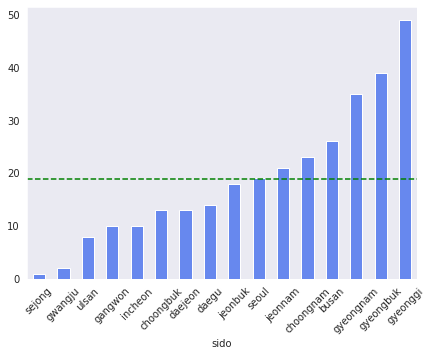

In [ ]:
## 지역별 병원 분포
sns.set_style('dark')
sns.set_palette('coolwarm')
plt.figure(figsize = (7,5))
ax = train.groupby(['sido'])['inst_id'].count().sort_values().plot(kind = 'bar')
ax.axhline(train.groupby(['sido'])['inst_id'].count().mean(),color = 'g', linestyle = '--')
plt.xticks(rotation = 45);

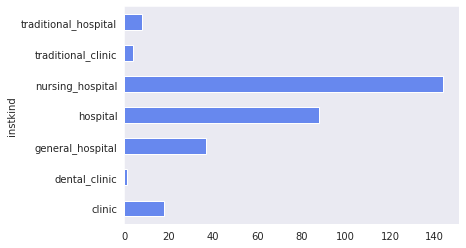

In [ ]:
plt.figure(figsize = (6,4))
train.groupby(['instkind'])['inst_id'].count().plot(kind = 'barh');

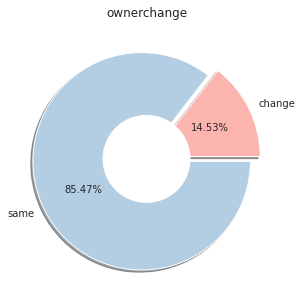

In [ ]:
train.groupby(['ownerChange'])['inst_id'].count()
# pie chart
fig = plt.figure(figsize = (5,5))
sns.set_palette('Pastel1')
plt.pie(train.groupby(['ownerChange'])['inst_id'].count().values,
        labels = train.groupby(['ownerChange'])['inst_id'].count().index,
        autopct = '%1.2f%%',
        explode = (0.05, 0.05),
        shadow = True
        )
center_circle = plt.Circle((0,0),0.40,fc= 'white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("ownerchange")

plt.show();

In [ ]:
train['OC'] = train['OC'].map(lambda x: x.strip()) 

In [ ]:
train.loc[train['ownerChange'] == 'change', 'OC'].value_counts()     ## ownerChange(대표자가 바뀔수록 폐업확률 높음) 

open     36
close     6
Name: OC, dtype: int64

In [ ]:
train.loc[~(train['ownerChange'] == 'change'), 'OC'].value_counts()

open     250
close      9
Name: OC, dtype: int64

#### target - 카테고리 feature 관계(분포)
- 지역별/병원 종류별 : 개업한 병원 많은 지역일수록 페업 병원 많음
- 특이점
    - 경남: 개업한 병원이 많지만 폐업한 병원 없음
    - 이외 충북, 울산, 대전, 대구, 인천, 강원, 광주, 세종은 폐업한 병원 없음 
    - 전북, 전남: 개업률 대비 폐업률이 높은 편
    ---
    - 한방병원/의원이 개업률 대비 페업률이 높은 편
    - 종합병원의 개업률 대비 폐업률이 낮은 편


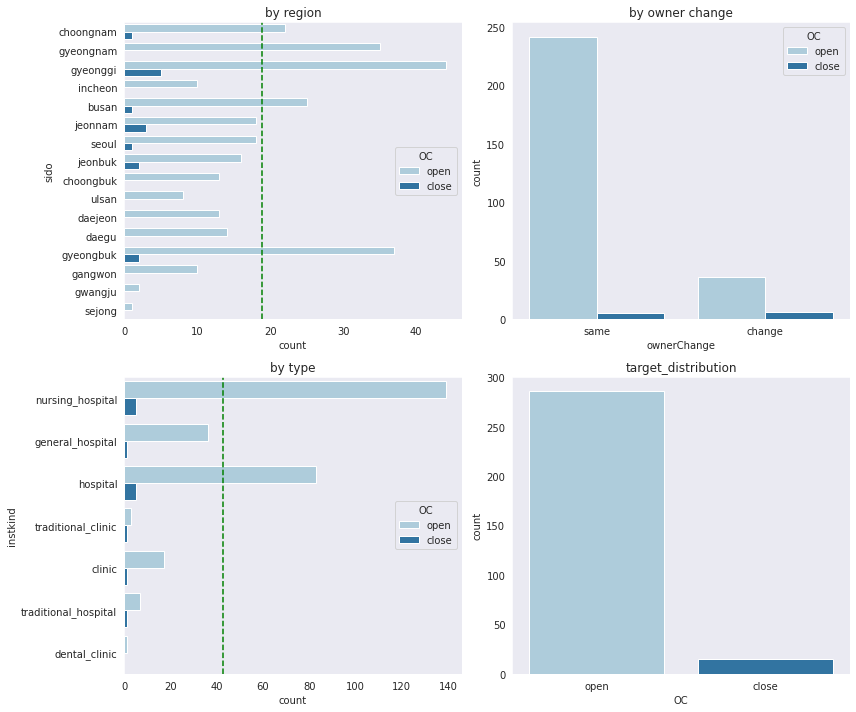

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (12,10))
sns.set_palette('Paired')

# 지역별 개폐업
sns.countplot(ax = axes[0,0], y = 'sido', hue = 'OC', data = train)
axes[0,0].axvline(train['sido'].value_counts().mean(),color = 'g', linestyle = '--')
axes[0,0].set_title('by region')

# 병원 종류별 개폐업
sns.countplot(ax = axes[1,0], y = 'instkind', hue = 'OC', data = train)    ## 전체 비중 : 요양병원 > (일반)병원 > 종합병원 > 의원 > 한방병원 > 
axes[1,0].axvline(train['instkind'].value_counts().mean(),color = 'g', linestyle = '--')
axes[1,0].set_title('by type')

# 대표자 변경 유무에 따른 개폐업
sns.countplot(ax = axes[0,1], x = 'ownerChange', hue = 'OC', data = train)
axes[0,1].set_title('by owner change')

# target 분포 >> 불균형
sns.countplot(ax = axes[1,1], x = train['OC'])   
axes[1,1].set_title('target_distribution')

plt.tight_layout()
plt.show()

In [ ]:
# 시군구 코드로 살펴본 병원 수  <<  의미 있을까 고민?
values = train['sgg'].value_counts().sort_values(ascending = False)[:20].index
for val in values:
    print(train[train['sgg'] == val]['sido'].values[0], end = ' , ')

gyeongnam , gyeonggi , gyeongbuk , gyeongbuk , jeonbuk , choongnam , choongnam , daegu , jeonbuk , gyeongnam , gyeongbuk , gyeonggi , daejeon , busan , busan , daejeon , jeonnam , gyeonggi , jeonnam , gyeongbuk , 

In [ ]:
pd.pivot_table(train, 
               index = ['sido', 'OC'],
               values = 'inst_id',
               aggfunc = 'count')

inst_id
sido      OC            
busan     close        1
          open        25
choongbuk open        13
choongnam close        1
          open        22
daegu     open        14
daejeon   open        13
gangwon   open        10
gwangju   open         2
gyeongbuk close        2
          open        37
gyeonggi  close        5
          open        44
gyeongnam open        35
incheon   open        10
jeonbuk   close        2
          open        16
jeonnam   close        3
          open        18
sejong    open         1
seoul     close        1
          open        18
ulsan     open         8

In [ ]:
pd.pivot_table(train, 
               index = ['instkind', 'OC'],
               values = 'inst_id',
               aggfunc = 'count')   # 수치상으로만 보면 traditional clinic/hospital의 close/open 비율 높음

inst_id
instkind             OC            
clinic               close        1
                     open        17
dental_clinic        open         1
general_hospital     close        1
                     open        36
hospital             close        5
                     open        83
nursing_hospital     close        5
                     open       139
traditional_clinic   close        1
                     open         3
traditional_hospital close        1
                     open         7

#### target - 수치형 feature 관계(분포) 
- target 분포의 불균형 정도가 심함
- target = 'open' 인 데이터가 많아 feature 분포의 불균형도 심함
- 병원 규모에 따른 재무 규모가 다르다 보니 값의 편차도 심함 => 정규화 필요

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max.columns', 90)

train.describe(include = 'number')

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.00,301.00,301.00,296.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,293.00,291.00,288.00
mean,219.06,81.04,20050125.80,145.71,12881747447.99,2014902794.59,10332439064.09,5654114566.90,269615124.57,511587022.57,186896557.27,78473220.78,210170013.40,3536586531.43,3414761591.75,697586157.96,115453344.05,11406727757.46,10534082118.15,340650296.67,251680.24,8765309695.37,4352924983.20,1758237408.65,4583473025.00,2646563537.79,5938212711.98,1265934904.06,11709054481.61,1842095257.74,9203487186.56,5023229977.34,222381267.86,561766892.66,173635978.89,68322593.34,256343936.62,3222852351.53,3106104321.46,610306968.80,106366730.83,10452140878.21,9651555200.27,323292139.29,222670.00,8146026488.79,3860583593.41,1510050431.99,4471247363.88,2709978815.42,5273919018.09,978627865.26,142.55,134.33
std,121.23,50.97,88938.15,118.92,20435433475.62,7460270656.57,14938862491.95,8083342530.26,802370115.51,1060379255.45,273865779.39,248610223.50,1134673320.88,6285995139.54,6093581292.15,1455331773.15,255170204.15,17105158994.37,15745251181.29,935938128.19,4308071.75,12861120755.28,6474261880.15,3194539704.26,7847530015.19,4697523199.71,12660352066.28,8248320818.01,18949978541.33,6744177967.94,13525668185.60,7406529701.28,527463657.86,1121855845.15,269389414.10,242851235.00,1111962861.42,6015754809.82,5823175588.82,1455248632.34,249009945.80,16495382441.75,15217916762.69,878435543.80,3811496.45,12557995349.37,6797242094.08,2953412250.37,7659580436.40,4564001071.00,10812593821.25,4688797890.98,160.19,151.06
min,1.00,1.00,19780124.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4696700774.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-20196244362.00,-2914969563.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4064822885.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-20147802018.00,-2781506722.00,0.00,0.00
25%,112.00,37.00,20011017.00,52.75,3252111902.00,0.00,2758200772.00,1626052720.00,8217133.00,80133952.00,50664742.00,0.00,-2168279.00,719925338.00,680651243.00,0.00,4177116.00,2900012337.00,2700123623.00,968000.00,0.00,1953076690.00,511012058.00,0.00,428500000.00,0.00,1224795478.00,0.00,2731341817.00,0.00,2253260463.00,1347917753.00,6453360.00,64731681.00,31429692.00,0.00,0.00,470362319.00,452686749.00,0.00,2054789.00,2479445642.00,2338407470.00,0.00,0.00,1283220350.00,285574118.00,0.00,25578782.00,0.00,1017572570.00,0.00,53.50,53.75
50%,230.00,75.00,20071126.00,136.50,5524218104.00,210410492.00,4684074465.00,2659892367.00,43637641.00,183196506.00,109732873.00,1024900.00,81307510.00,1516732005.00,1473800649.00,215856423.00,24083074.00,6100798930.00,5549396982.00,35825261.00,0.00,4457666685.00,1754751686.00,229570425.00,2036935000.00,1136775833.00,3033906841.00,0.00,5005326364.00,173299410.00,4170070288.00,2365337858.00,43262276.00,171601490.00,94223002.00,1006880.00,101169101.00,1234391621.00,1199564450.00,116044900.00,24564307.00,5591345750.00,5124337672.00,27336000.00,0.00,3784552900.00,1454049945.00,85425488.00,1969746813.00,1100000000.00,2894969804.00,0.00,80.00,79.00
75%,321.00,123.00,20111021.00,193.00,12748392940.00,910527771.00,10778762060.00,6363400069.00,205033071.00,420333030.00,

In [ ]:
test.describe(include = 'number')

,inst_id,OC,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,127.00,0.00,127.00,126.00,119.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00,119.00,112.00
mean,205.91,NaN,95.86,20050851.33,172.79,18244463620.63,3973320516.57,13404099537.94,7415083961.45,517551263.83,870430718.98,316825325.56,114861558.93,394071216.34,4418037833.49,4232244649.62,870476317.98,178378586.63,16051527429.09,14896463543.04,404887724.73,2624456.58,13377519288.64,6851130144.29,2927575574.41,6761561644.11,4204389984.48,6731170208.40,1985867306.01,16664776659.78,3642246675.11,12104069115.09,6631639135.78,433684710.94,787028309.79,323395108.63,81508823.81,487180581.30,4111472071.40,3934688065.11,688392318.64,167408574.63,14277847448.41,13362088426.02,351383068.58,19731.14,11898512213.34,5633432084.14,2181713388.14,6495025895.90,4482682424.41,6116178748.75,1648473877.65,204.25,189.22
std,131.80,NaN,52.68,87958.15,126.02,31335295156.85,14199483023.80,20544811391.82,12100434017.39,1193138608.47,1804461135.73,458778129.38,308979631.48,1813462235.36,7521406005.71,7273518140.54,2227548899.90,318642265.01,22372394167.56,21116180475.17,1060220556.47,29103067.92,20165416746.20,11475199571.89,5627846058.64,10907072446.22,5889709456.20,10263986272.29,5569804314.87,29160190784.29,13014659172.94,19177793316.28,11203546861.58,1044750657.22,1691777879.10,553849033.80,223658104.66,1698042422.81,7741019969.07,7462307012.62,1857910793.88,304988387.72,21784180338.05,20854039250.72,979109688.08,220600.90,19711820111.03,9662047510.14,4952448637.74,12036733189.77,7517020054.74,9813461143.42,4779443752.86,277.31,243.03
min,2.00,NaN,6.00,19760409.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5734451117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-3821589613.00,-8636717673.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4645265248.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2955957091.00,-8600000000.00,16.00,0.00
25%,89.00,NaN,51.00,20000826.00,94.00,3235888530.00,0.00,3083860292.00,1666742310.00,16410940.00,83655518.00,52591629.00,0.00,10602231.00,820736077.00,754920511.00,1235600.00,1245000.00,4569689384.00,4236533525.00,4900000.00,0.00,2174968345.00,577069711.00,0.00,850000000.00,400000000.00,1735155943.00,0.00,2968797323.00,0.00,2664095879.00,1364295627.00,10381452.00,52938716.00,39766943.00,0.00,0.00,387778576.00,385686389.00,0.00,0.00,2857352809.00,2807762809.00,0.00,0.00,1679896491.00,391415567.00,0.00,132136760.00,0.00,949265633.00,0.00,59.50,54.75
50%,199.00,NaN,95.00,20071066.00,156.00,6637115540.00,189692304.00,5716501623.00,3263054070.00,53191709.00,231519005.00,150785906.00,8433480.00,146380757.00,1734400213.00,1671187318.00,210391970.00,41864552.00,7257672915.00,6617844688.00,51674083.00,0.00,5278504783.00,2291389188.00,589911856.00,2941014494.00,2040000000.00,3154172062.00,0.00,5944442070.00,136085133.00,5203995098.00,2898863180.00,49915330.00,203589664.00,135971407.00,0.00,135126380.00,1593779102.00,1505507137.00,149800050.00,28776267.00,5764482916.00,5450482767.00,33173766.00,0.00,4494217146.00,1554505639.00,300000000.00,2030000000.00,1750000000.00,2427138957.00,0.00,106.00,99.00
75%,328.00,NaN,144.50,20117895.50,213.00,17040391156.00,1192329214.00,

In [ ]:
## target 'OC' 
train['target'] = train['OC'].map({'open':1, 'close':0})
train.target.value_counts()

1    286
0     15
Name: target, dtype: int64

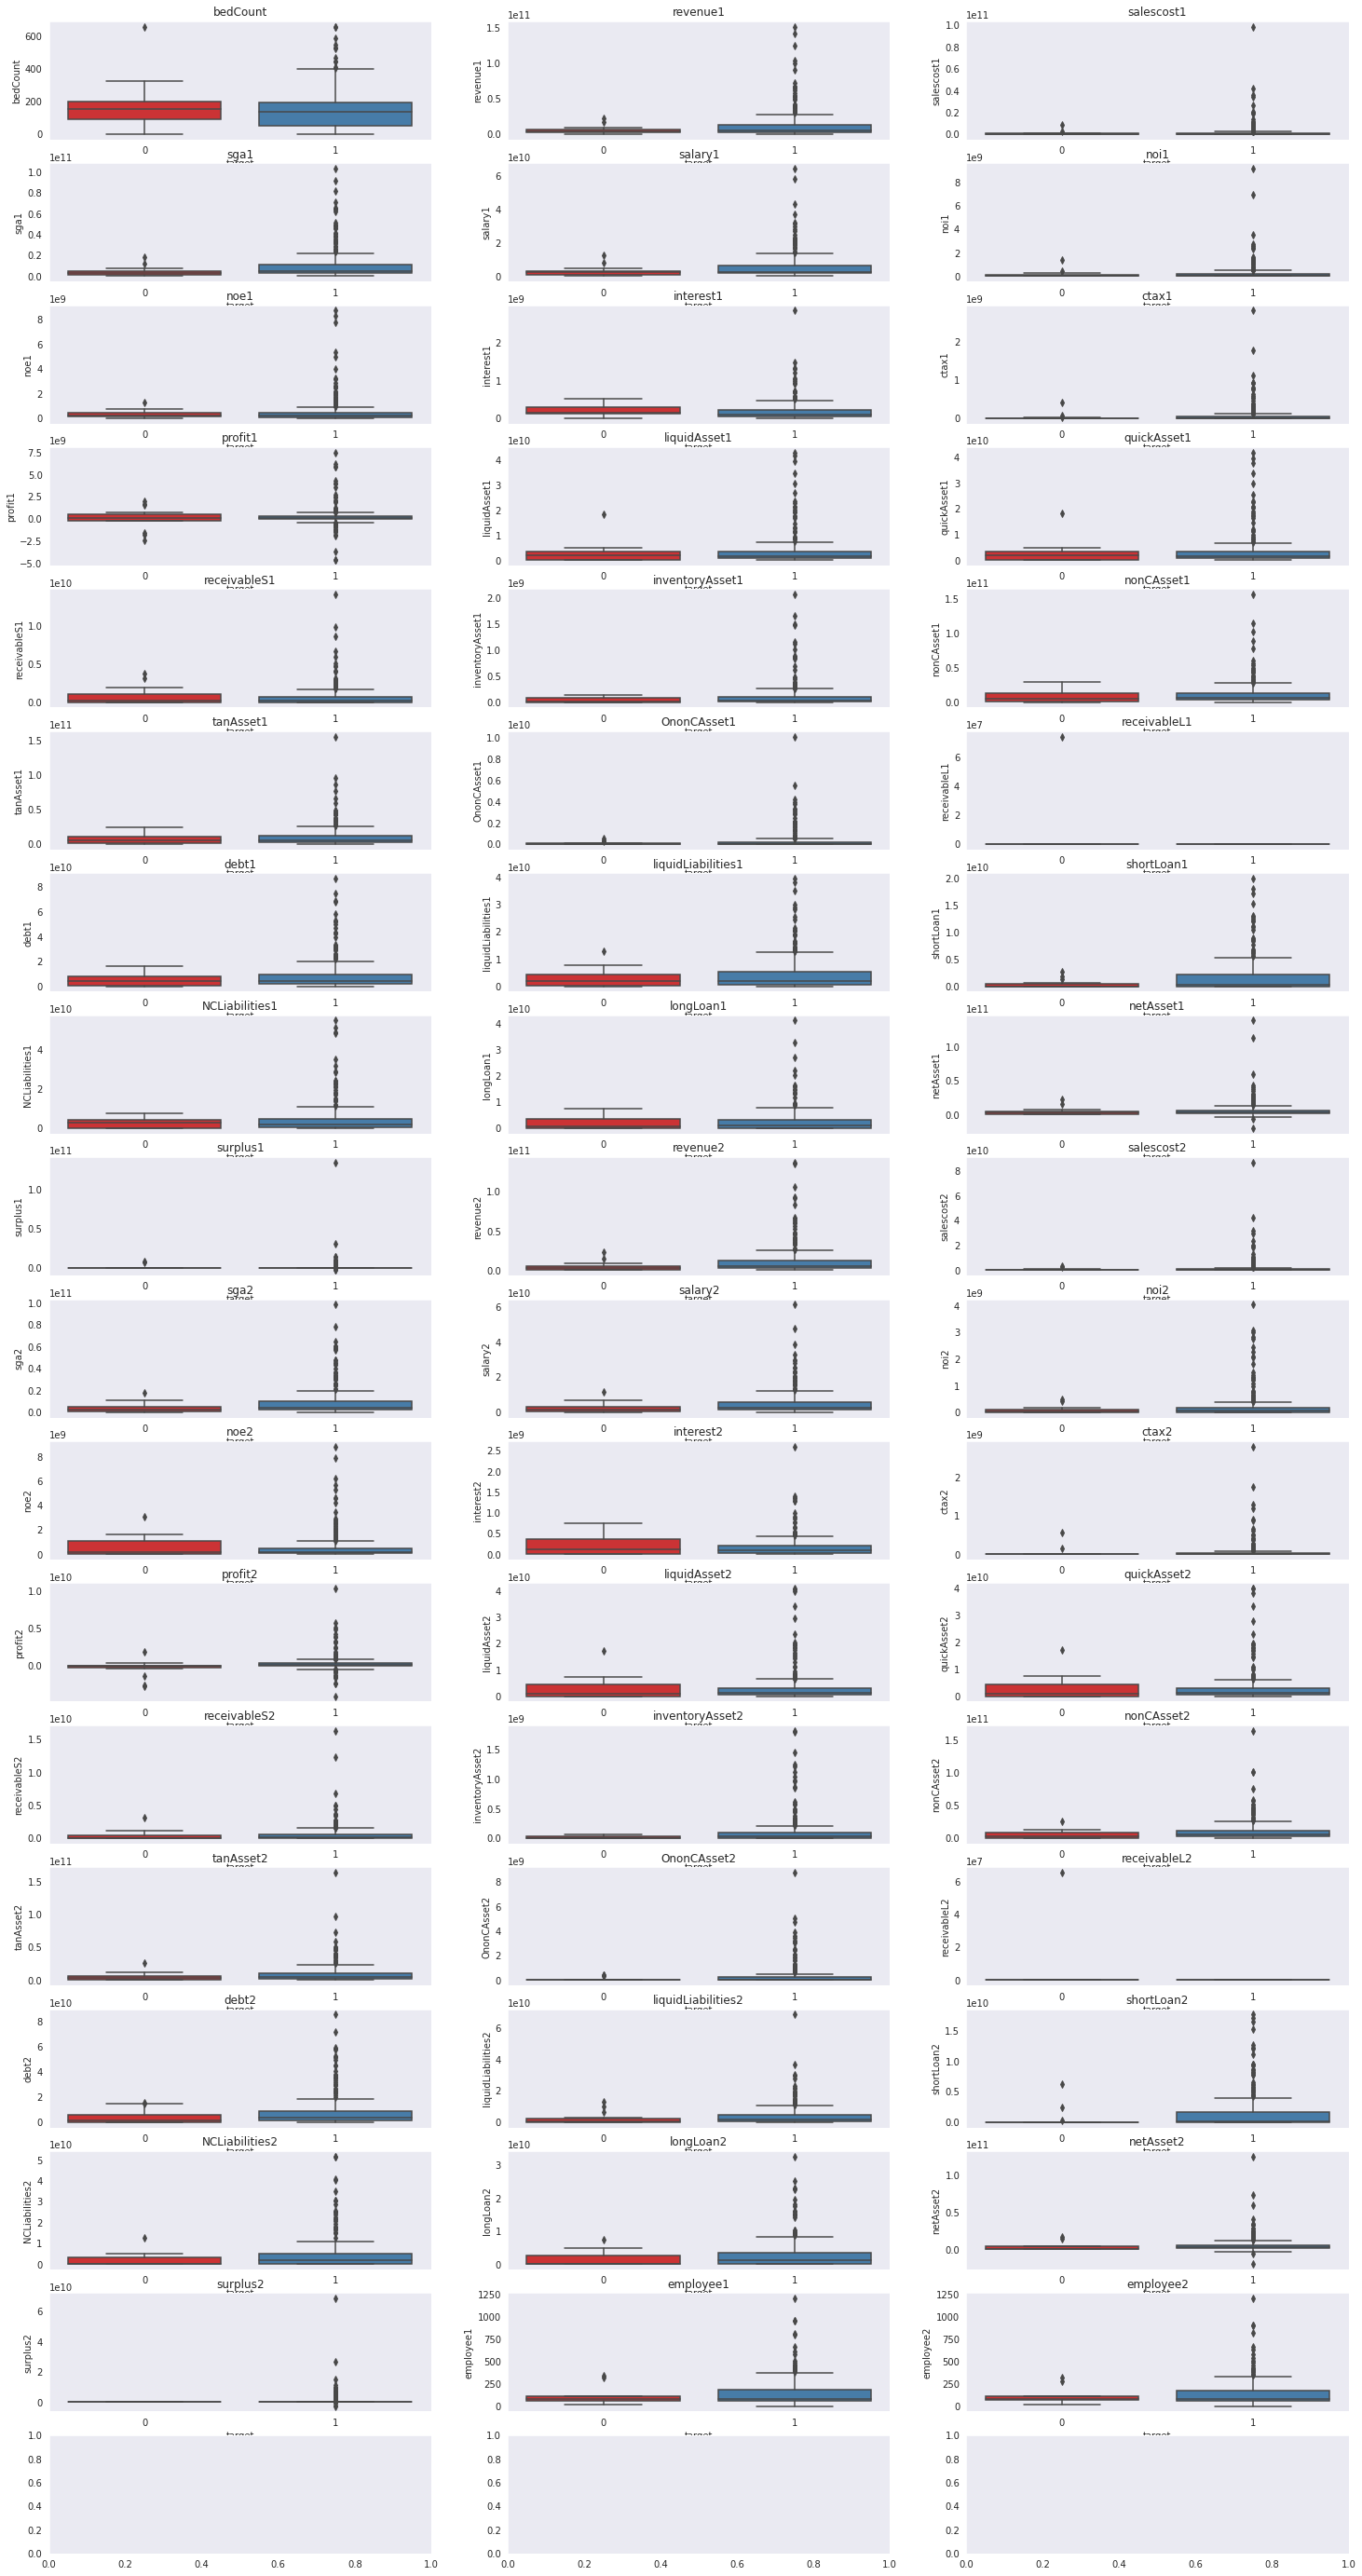

In [ ]:
fig, axes = plt.subplots(18,3, figsize = (25,50))
sns.set_palette('Set1')
ax = axes.flatten()
col = train.describe(include = 'number').columns[3:-1]
for i in range(len(train.describe(include = 'number').columns[3:-1])):
    sns.boxplot(x = train['target'], y = train[col[i]], data = train, ax = ax[i])
    ax[i].set_title(f'{col[i]}')

plt.show()

### 중복값 제거
- 'inst_id' 제거한 칼럼으로 중복 확인!!!! 
- test data 중복 데이터 -> 제거

In [ ]:
train.columns
test.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee1', 'employee2', 'ownerChange'],
      dtype='object')

In [ ]:
# inst_id 제거 칼럼 중복체크
train[train.columns[1:]].duplicated().sum()
test[test.columns[1:]].duplicated().sum()

1

In [ ]:
# test_data 중복 row
test.iloc[[112,113]]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
112,395,NaN,jeonbuk,143,20161229.00,156.00,nursing_hospital,10611031.00,0.00,8800.00,0.00,0.00,0.00,0.00,0.00,10602231.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.00,NaN,NaN
113,396,NaN,jeonbuk,143,20161229.00,156.00,nursing_hospital,10611031.00,0.00,8800.00,0.00,0.00,0.00,0.00,0.00,10602231.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.00,NaN,NaN


In [ ]:
test = test.drop(index = 113)

In [ ]:
test.iloc[[112,113]]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
112,395,NaN,jeonbuk,143,20161229.00,156.00,nursing_hospital,10611031.00,0.00,8800.00,0.00,0.00,0.00,0.00,0.00,10602231.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.00,NaN,NaN
114,397,NaN,jeonbuk,147,20130722.00,194.00,nursing_hospital,5479247780.00,295974633.00,5173015225.00,3263054070.00,7071508.00,70040708.00,65052343.00,0.00,-52711278.00,753946845.00,744070595.00,529993532.00,9876250.00,6845456374.00,6617844688.00,25799000.00,0.00,2186917692.00,356470648.00,0.00,1830447044.00,1830447044.00,5412485527.00,0.00,5228549030.00,326796181.00,5123227065.00,3153987490.00,26282595.00,82381907.00,77726069.00,0.00,-277573528.00,839722067.00,829705727.00,590637123.00,10016340.00,7106466367.00,6958012823.00,20799000.00,0.00,2470991629.00,378970298.00,0.00,2092021331.00,2092021331.00,5475196805.00,0.00,106.00,103.00,same


### 결측치 확인
- 재무제표 정보가 없는 데이터(train:8, test:2)
- 직원수 누락(13,15), ownerchange 누락(12,15), 병상수 누락(5,8) 
- 일부 누락된 데이터가 있지만 전체 데이터 갯수가 적으므로 삭제하지 않고 모델 학습시 imputer 활용하여 보강 or 무시하고 진행 예정

In [ ]:
train.isnull().sum() 

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [ ]:
test.isnull().sum()

inst_id                 0
OC                    126
sido                    0
sgg                     0
openDate                1
bedCount                8
instkind                2
revenue1                2
salescost1              2
sga1                    2
salary1                 2
noi1                    2
noe1                    2
interest1               2
ctax1                   2
profit1                 2
liquidAsset1            2
quickAsset1             2
receivableS1            2
inventoryAsset1         2
nonCAsset1              2
tanAsset1               2
OnonCAsset1             2
receivableL1            2
debt1                   2
liquidLiabilities1      2
shortLoan1              2
NCLiabilities1          2
longLoan1               2
netAsset1               2
surplus1                2
revenue2                2
salescost2              2
sga2                    2
salary2                 2
noi2                    2
noe2                    2
interest2               2
ctax2       

In [ ]:
train[train['revenue1'].isnull() == True]  # 재무제표 정보 없음  .... 어떻게 처리? 

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,target
1,3,open,gyeongnam,32,19970401,410.00,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.00,813.00,same,1
14,26,open,ulsan,127,20160531,237.00,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,951.00,901.00,same,1
32,55,open,incheon,141,19930708,232.00,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.00,323.00,same,1
55,87,open,gyeonggi,120,20130314,327.00,nursing_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.00,203.00,same,1
60,94,open,gangwon,128,20031201,244.00,nursing_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
248,353,open,gyeonggi,81,20040303,255.00,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.00,244.00,same,1
257,362,open,choongnam,94,19861212,50.00,nursing_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.00,89.00,same,1
258,363,open,gyeongbuk,95,20141219,0.00,clinic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


#### 결측치가 하나라도 포함된 행
- #(rows) = 24
- np.nan이 아닌 0.0인 값도 오기일 가능성 있으므로 확인 필요 
- 개업연도 확인 후 2016/2017 이외 재무제표 데이터 == 0.0 이면 null로 간주 => 보간 필요
- 카테고리 데이터 
    - bedcount는 instkind 참고로 임의 보간

In [ ]:
test_feat = test.drop(columns = ['OC'])

In [ ]:
## 결측치가 하나라도 포함된 행 
train[train.isnull().any(axis = 1) == True]   #(rows) = 24
#train[train.isnull().all(axis = 1) == True]  # = 0   

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,target
1,3,open,gyeongnam,32,19970401,410.00,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.00,813.00,same,1
14,26,open,ulsan,127,20160531,237.00,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,951.00,901.00,same,1
32,55,open,incheon,141,19930708,232.00,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.00,323.00,same,1
35,58,close,gyeonggi,168,20130206,132.00,nursing_hospital,2681765580.00,180200922.00,2014579640.00,936645110.00,59924069.00,428721218.00,284069476.00,0.00,118187869.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2093132140.00,142854148.00,1751389576.00,916482193.00,21947086.00,147298317.00,113100675.00,0.00,73537185.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51.00,NaN,change,0
48,74,open,seoul,1,19940425,28.00,traditional_hospital,8872426915.00,964124895.00,7638919868.00,4488957824.00,19153521.00,216088892.00,204479315.00,72446781.00,0.00,1302114675.00,1186742960.00,2671059.00,97648359.00,8347311458.00,8178953358.00,2200500.00,0.00,6749131935.00,5759131935.00,4000000000.00,990000000.00,990000000.00,2900294198.00,0.00,8632333447.00,899417417.00,7616309072.00,4283770860.00,132492468.00,218881005.00,199357358.00,30218421.00,0.00,1002794432.00,891514383.00,0.00,80868500.00,8581435416.00,8368728596.00,25520500.00,0.00,5958277645.00,5956277645.00,4992758274.00,2000000.00,0.00,3625952203.00,0.00,NaN,NaN,NaN,1
55,87,open,gyeonggi,120,20130314,327.00,nursing_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.00,203.00,same,1
60,94,open,gangwon,128,20031201,244.00,nursing_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
62,96,open,busan,64,20170602,128.00,nursing_hospital,523640550.00,23067726.00,835577490.00,564463637.00,7534205.00,52630597.00,52630597.00,0.00,-380101058.00,607366165.00,595391402.00,1015000.00,11974763.00,3629703850.00,3629703850.00,0.00,0.00,3513950273.00,3342068583.00,2918153230.00,171881690.00,171881690.00,723119742.00,723119742.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,38.00,NaN,NaN,1
71,107,close,jeonbuk,26,19990805,NaN,traditional_hospital,4131857876.00,143611800.00,3529097014.00,2198043355.00,56630198.00,228194537.00,113598011.00,22221340.00,265363383.00,1970952253.00,1963786853.00,0.00,7165400.00,3553690709.00,2749986147.00,527179060.00,0.00,2803885092.00,2793826477.00,2590000000.00,10058615.00,0.00,2720757870.00,0.00,3318141151.00,144310353.00,2982098323.00,1709276338.00,58244152.00,164510269.00,91316429.00,13350570.00,72115788.00,1694658561.00,1686307261.00,0.00,8351300.00,3451466150.00,277845

In [ ]:
test_feat[test_feat.isnull().any(axis = 1) == True]  #(rows) = 24
#test_feat[test_feat.isnull().all(axis = 1) == True] 

,inst_id,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
2,6,jeonnam,103,19890427.00,276.00,general_hospital,23260305967.00,2542570943.00,23087485220.00,11687337552.00,1601942757.00,1380941439.00,810120395.00,0.00,-2148748878.00,12653132775.00,11339218657.00,7337106674.00,1313914118.00,29454672516.00,28306315536.00,138806980.00,0.00,0.00,28306315536.00,21822782890.00,0.00,0.00,0.00,16385400958.00,24680345066.00,1500100033.00,23739495734.00,11911460194.00,236121643.00,1328858389.00,625923370.00,15210270.00,-1667197717.00,13542016215.00,12638512618.00,7003702834.00,903503597.00,29388100802.00,27775892339.00,428850980.00,0.00,0.00,27775892339.00,21822782890.00,0.00,0.00,0.00,16385400958.00,NaN,NaN,NaN
10,24,gyeonggi,169,20071109.00,NaN,traditional_clinic,70340410791.00,15703609481.00,51774179537.00,32040054580.00,446597276.00,1730254303.00,1658762094.00,238518390.00,1340446356.00,9285804386.00,8766996223.00,13083630.00,518808163.00,56412209806.00,55132585663.00,940029255.00,0.00,57040737104.00,18867341663.00,10966044435.00,38173395441.00,23647710000.00,8657277088.00,7321694997.00,56091019850.00,12750399682.00,41355281669.00,26619996530.00,1604990993.00,2068379179.00,1941941841.00,0.00,1521950313.00,9677090984.00,9071466702.00,11432010.00,605624282.00,62560959004.00,60246819338.00,980529255.00,0.00,62419285026.00,15143328141.00,7749622618.00,47275956885.00,33318400000.00,9818764962.00,8483182871.00,532.00,409.00,same
13,30,seoul,36,20080801.00,173.00,hospital,6637115540.00,0.00,7465698401.00,3715042090.00,230399498.00,1903198445.00,1779580634.00,0.00,-2501381808.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7435991091.00,0.00,8509531708.00,3991394550.00,171080134.00,1652998533.00,1498246052.00,7460.00,-2555466476.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,same
15,32,busan,64,19950330.00,226.00,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566.00,566.00,same
20,48,daegu,40,19970228.00,154.00,hospital,13516957558.00,2469250576.00,10723923120.00,6759008058.00,27333859.00,190260103.00,185648368.00,0.00,160857618.00,2127027527.00,2010006633.00,1321744353.00,117020894.00,17296814256.00,17192707456.00,91058000.00,0.00,9176201949.00,9176201949.00,6149040062.00,0.00,0.00,10247639834.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,150.00,NaN,NaN
22,64,jeonbuk,34,20060629.00,NaN,hospital,3207566930.00,26568783.00,3242980986.00,1628327842.00,370387.00,0.00,0.00,0.00,-61612452.00,5021154737.00,4648822830.00,0.00,372331907.00,35966517012.00,34950096428.00,877111000.00,0.00,24367583508.00,9299760234.00,4579304677.00,15067823274.00,9630291360.00,16620088241.00,0.00,3493286770.00,92333940.00,4614432658.00,1871573913.00,3331.00,842694896.00,835709710.00,0.00,-2056171393.00,5548918205.00,5252864326.00,2651482168.00,296053879.00,35512534044.00,34370840460.00,935991000.00,0.00,24814213959.00,8077364409.00,0.00,16736849550.00,10281084209.00,16247238290.00,0.00,NaN,NaN,NaN
40,123,jeonnam,144,20081210.00,NaN,nursing_hospital,4647433010.00,232848337.00,4043633900.00,2588544084.00,12725732.00,331257399.00,111070415.00,33004720.00,19414386.00,1441307803.00,1372768532.00,61982650.00,68539271.00,2717679852.00,2576997468.00,131000000.00,0.00,32

In [ ]:
#test_feat.iloc[120]

#### instkind 기준으로 bedcount 결측치 보완

In [ ]:
train.shape, test.shape

((301, 59), (126, 58))

In [ ]:
## train, test data concat 하여 instkind 기준 bedcount 평균
train_test_df = pd.concat([train,test],join = 'inner', ignore_index = True ).sort_values(by = 'inst_id')
train_test_df.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228.00,175.00,nursing_hospital,4217530010.00,0.00,3961134739.00,2033835290.00,15652441.00,15236236.00,13236236.00,31641798.00,225169678.00,1012699685.00,997671878.00,470055740.00,15027807.00,2514586477.00,2360683543.00,143449600.00,0.00,682825991.00,201323700.00,0.00,481502291.00,351000000.00,2844460171.00,1496394171.00,4297848250.00,0.00,4057421812.00,2063787360.00,16194675.00,29983354.00,15683046.00,18808074.00,207829685.00,830169459.00,816570489.00,523702570.00,13598970.00,2548114776.00,2386262842.00,145898600.00,0.00,758993742.00,222876855.00,0.00,536116887.00,390000000.00,2619290493.00,1271224493.00,62.00,64.00,same
301,2,NaN,incheon,139,19981125.00,300.00,general_hospital,66824864410.00,0.00,65657092101.00,32236953402.00,4314093449.00,4901516562.00,1775872236.00,76680000.00,503669196.00,25913847298.00,24387412809.00,724257978.00,1526434489.00,48072817614.00,46299313665.00,746312240.00,0.00,67690895830.00,54260878189.00,38059269376.00,13430017641.00,6319096673.00,6295769082.00,8944587276.00,63603752482.00,0.00,62611262314.00,30169456545.00,4076448390.00,4332356668.00,1578625701.00,218399804.00,518182086.00,24989917015.00,23679279656.00,1237753941.00,1310637359.00,46501910026.00,43562963177.00,796386240.00,0.00,55406431667.00,50684431667.00,37143344381.00,4720000000.00,4690000000.00,16085395374.00,8944587276.00,693.00,693.00,same
1,3,open,gyeongnam,32,19970401.00,410.00,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.00,813.00,same
2,4,open,gyeonggi,89,20161228.00,468.00,nursing_hospital,1004521989.00,515483669.00,447219722.00,296402310.00,76156.00,30000.00,0.00,0.00,41864754.00,272442138.00,253682170.00,8095950.00,18759968.00,120481028.00,120481028.00,0.00,0.00,92414342.00,92414342.00,0.00,0.00,0.00,300508824.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,234.00,1.00,same
302,5,NaN,jeju,149,20160309.00,44.00,hospital,34957575568.00,0.00,32592697196.00,16722544253.00,68710235.00,1981032861.00,1936454791.00,0.00,452555746.00,5861727241.00,5372198189.00,661028976.00,489529052.00,75110103878.00,66786481122.00,4500000.00,0.00,66267365958.00,42109451947.00,23300000000.00,24157914011.00,17200000000.00,14704465161.00,10462774450.00,37542526998.00,0.00,38685229259.00,18977322462.00,191802228.00,3694365215.00,2016114115.00,0.00,-4645265248.00,5503720305.00,4943368382.00,154430728.00,560351923.00,65593789830.00,65453024830.00,14500000.00,0.00,67308375170.00,42098280733.00,24200000000.00,25210094437.00,18300000000.00,3789134965.00,0.00,379.00,371.00,same


In [ ]:
train_test_df.groupby(['instkind'])['bedCount'].mean()

instkind
clinic                   5.82
dental_clinic            0.00
general_hospital       271.96
hospital                98.08
nursing_hospital       177.73
traditional_clinic       0.00
traditional_hospital    46.67
Name: bedCount, dtype: float64

In [ ]:
def fill_bedcount(df):

    mapping = {'clinic': 6.02, 'dental_clinic': 0.00, 'general_hospital' : 271.96, 'hospital': 98.08,
            'nursing_hospital':  177.73, 'traditional_clinic' : 0.00,'traditional_hospital': 46.67, np.nan:0.0}   #np.nan인 경우는 0으로 

    idxs = df[df['bedCount'].isnull() == True].index

    for i in idxs:
        df.loc[i, 'bedCount'] = mapping[df.loc[i, 'instkind']]

    return df

In [ ]:
train = fill_bedcount(train)
test = fill_bedcount(test)

In [ ]:
train[train['bedCount'].isnull() == True]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,target


In [ ]:
test[test['bedCount'].isnull() == True]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange


## feature 특징 및 결측치 보완

#### employee == 0 누락데이터 값 변경

In [ ]:
## employee == 0 인 데이터 
train.query('employee1 == 0  or employee2 == 0')
train.query('employee1 == 0  or employee2 == 0')[['openDate','employee1','employee2']]   #[159,163] 누락된 것으로 추정. 

# 병원 설립연도 기준 [172]는 제외, 병상수가 100개 이상 => 종업원수 != 0 => 전년도와 동일하게 변경 

train['employee1'] = train['employee1'].replace(train.loc[159,'employee1'], train.loc[159,'employee2']).astype(float)
train['employee2'] = train['employee2'].replace(train.loc[163,'employee2'], train.loc[163,'employee1']).astype(float)

#train.iloc[163]['employee2']

### 개업연도(opendate) 
- 타입 변환, 결측치 보완(test : 20200101 임시 작성)
- 개업연도- target 관계: 뚜렷한 관계는 보이지 않음(데이터 불균형)
- 다만 개원기간이 긴 병원이 open에 많이 분포

In [ ]:
def opendate_col(df):
    # 우선 str으로 변환 후 

    # test_data float 형식
    if df['openDate'].dtype == 'float':
        # test_data 중 nan - 임시로 20200101 => 'duration <0 '
        df['openDate'] = df['openDate'].fillna(20200101.0).astype(int).astype(str)
    else :
        df['openDate'] = df['openDate'].astype(str)

    # to_datetime
    df['opendate'] = pd.to_datetime(df['openDate'], format="%Y/%m/%d")

    df['open_year'] = df['opendate'].dt.year
    df['base'] = len(df)* 0 + 2017

    # 2017년 기준 개원기간
    df['duration'] = df['base'] - df['open_year']  

    return df

In [ ]:
train = opendate_col(train)
test = opendate_col(test)

In [ ]:
test.iloc[120]

inst_id                        421
OC                             NaN
sido                      gyeonggi
sgg                            177
openDate                  20110415
                      ...         
ownerChange                   same
opendate       2011-04-15 00:00:00
open_year                     2011
base                          2017
duration                         6
Name: 121, Length: 62, dtype: object

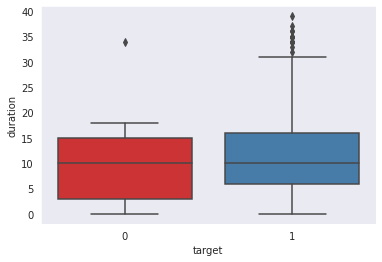

In [ ]:
sns.boxplot(y = train['duration'], x = train['target'], data = train)   #타겟에 따른 데이터 분포 차이 있음. 개업연도와 폐업여부 뚜렷한 관계 파악 안됨 

##### 개원연도 따른 재무제표 결측치 보완
- 개원연도 = 2017인 경우, col_2의 결측치 == 0

In [ ]:
## 결측치 포함 데이터 중 개업연도 : 2016 또는 2017
train.iloc[train[train.isnull().any(axis = 1) == True].index].query('open_year == 2016 or open_year == 2017')

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,target,opendate,open_year,base,duration
14,26,open,ulsan,127,20160531,237.00,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,951.00,901.00,same,1,2016-05-31,2016,2017,1
62,96,open,busan,64,20170602,128.00,nursing_hospital,523640550.00,23067726.00,835577490.00,564463637.00,7534205.00,52630597.00,52630597.00,0.00,-380101058.00,607366165.00,595391402.00,1015000.00,11974763.00,3629703850.00,3629703850.00,0.00,0.00,3513950273.00,3342068583.00,2918153230.00,171881690.00,171881690.00,723119742.00,723119742.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,38.00,NaN,NaN,1,2017-06-02,2017,2017,0
206,298,open,gyeongnam,32,20170120,160.00,nursing_hospital,3279139204.00,372696579.00,3507971938.00,2659892367.00,1596568.00,83065655.00,83065655.00,0.00,-682998400.00,423710031.00,366251331.00,182604364.00,57458700.00,6990698210.00,6972698210.00,8000000.00,0.00,3478120846.00,648120846.00,0.00,2830000000.00,2830000000.00,3936287395.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,103.00,NaN,1,2017-01-20,2017,2017,0
242,345,open,busan,69,20170420,0.00,traditional_clinic,684550260.00,0.00,561935625.00,301400000.00,8067090.00,2748281.00,1364824.00,18640111.00,109293333.00,1332665086.00,1331506704.00,62436350.00,0.00,772105779.00,502105779.00,270000000.00,0.00,95280871.00,94910871.00,0.00,370000.00,0.00,2009489994.00,0.00,774560815.00,0.00,756096906.00,363830000.00,15339220.00,4402666.00,617047.00,8050806.00,21349657.00,1172967732.00,1171014420.00,49160437.00,0.00,796808527.00,526808527.00,270000000.00,0.00,69579598.00,69209598.00,0.00,370000.00,0.00,1900196661.00,0.00,NaN,NaN,NaN,1,2017-04-20,2017,2017,0


In [ ]:
test[test.columns[2:]].isnull().any(axis = 1).sum()

19

In [ ]:
test[test[test.columns[2:]].isnull().any(axis = 1) == True]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,opendate,open_year,base,duration
2,6,NaN,jeonnam,103,19890427,276.00,general_hospital,23260305967.00,2542570943.00,23087485220.00,11687337552.00,1601942757.00,1380941439.00,810120395.00,0.00,-2148748878.00,12653132775.00,11339218657.00,7337106674.00,1313914118.00,29454672516.00,28306315536.00,138806980.00,0.00,0.00,28306315536.00,21822782890.00,0.00,0.00,0.00,16385400958.00,24680345066.00,1500100033.00,23739495734.00,11911460194.00,236121643.00,1328858389.00,625923370.00,15210270.00,-1667197717.00,13542016215.00,12638512618.00,7003702834.00,903503597.00,29388100802.00,27775892339.00,428850980.00,0.00,0.00,27775892339.00,21822782890.00,0.00,0.00,0.00,16385400958.00,NaN,NaN,NaN,1989-04-27,1989,2017,28
13,30,NaN,seoul,36,20080801,173.00,hospital,6637115540.00,0.00,7465698401.00,3715042090.00,230399498.00,1903198445.00,1779580634.00,0.00,-2501381808.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7435991091.00,0.00,8509531708.00,3991394550.00,171080134.00,1652998533.00,1498246052.00,7460.00,-2555466476.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,same,2008-08-01,2008,2017,9
15,32,NaN,busan,64,19950330,226.00,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566.00,566.00,same,1995-03-30,1995,2017,22
20,48,NaN,daegu,40,19970228,154.00,hospital,13516957558.00,2469250576.00,10723923120.00,6759008058.00,27333859.00,190260103.00,185648368.00,0.00,160857618.00,2127027527.00,2010006633.00,1321744353.00,117020894.00,17296814256.00,17192707456.00,91058000.00,0.00,9176201949.00,9176201949.00,6149040062.00,0.00,0.00,10247639834.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,150.00,NaN,NaN,1997-02-28,1997,2017,20
22,64,NaN,jeonbuk,34,20060629,98.08,hospital,3207566930.00,26568783.00,3242980986.00,1628327842.00,370387.00,0.00,0.00,0.00,-61612452.00,5021154737.00,4648822830.00,0.00,372331907.00,35966517012.00,34950096428.00,877111000.00,0.00,24367583508.00,9299760234.00,4579304677.00,15067823274.00,9630291360.00,16620088241.00,0.00,3493286770.00,92333940.00,4614432658.00,1871573913.00,3331.00,842694896.00,835709710.00,0.00,-2056171393.00,5548918205.00,5252864326.00,2651482168.00,296053879.00,35512534044.00,34370840460.00,935991000.00,0.00,24814213959.00,8077364409.00,0.00,16736849550.00,10281084209.00,16247238290.00,0.00,NaN,NaN,NaN,2006-06-29,2006,2017,11
52,165,NaN,jeonbuk,136,20050321,440.00,nursing_hospital,2179020670.00,312206615.00,1507567008.00,907395730.00,33436412.00,208281214.00,18920952.00,0.00,184402245.00,3535249679.00,3432644103.00,3132667033.00,102605576.00,16681779738.00,16651052086.00,0.00,0.00,12496838310.00,5800803717.00,1309874205.00,6696034593.00,4089146674.00,7720191107.00,7720191107.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,2005-03-21,2005,2017,12
56,181,NaN,jeonbuk,26,20121218,539.00,nursing_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250.00,200.00,same,2012-12-18,2012,2017,5
82,246,NaN,jeonnam,145,19880801,

### 병상수(bedcount) 기준 - employee 


In [ ]:
cond_1 = lambda x: x[x['bedCount']>=100]
cond_2 = lambda x: x[x['bedCount'] <30]

In [ ]:
# 병상수 100 이상
train.groupby(['bedCount']).apply(cond_1)[['employee1', 'employee2']].describe().T

,count,mean,std,min,25%,50%,75%,max
employee1,181.00,178.76,182.00,1.00,68.00,100.00,212.00,1200.00
employee2,178.00,168.02,172.30,1.00,67.25,95.50,211.75,1200.00


In [ ]:
# 병상수 30 이상 100 미만
train.query('bedCount >=30 & bedCount <100')[['employee1', 'employee2']].describe().T    ##issue: 30이상 100 미만>  lambda 함수가 적용이 안되서 query로 filtering 후 추출

,count,mean,std,min,25%,50%,75%,max
employee1,67.00,86.94,74.88,1.00,42.00,66.00,94.50,373.00
employee2,67.00,85.69,70.90,1.00,42.00,66.00,96.50,382.00


In [ ]:
# 병상수 30미만
train.groupby(['bedCount']).apply(cond_2)[['employee1', 'employee2']].describe().T

,count,mean,std,min,25%,50%,75%,max
employee1,43.00,78.09,106.15,1.00,20.00,50.00,79.00,454.00
employee2,43.00,73.81,99.68,1.00,15.00,49.00,73.00,425.00


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)  # float 형식으로 
# pd.set_option('display.float_format', '{:.2e}'.format)
pd.pivot_table(train, 
               index = 'instkind',
               columns = 'OC',
               values = ['revenue1','profit1','netAsset1'],
               aggfunc = 'mean')
               #aggfunc = ['mean','min','max'])  

netAsset1                       profit1               \
OC                           close           open          close         open   
instkind                                                                        
clinic               1499369642.00  4755167587.31  -180467241.00 347314540.75   
dental_clinic                  NaN  6421645071.00            NaN 658807009.00   
general_hospital     4433308587.00 14855115135.84 -2483310603.00 302577218.16   
hospital             3392145430.80  7096758569.84    -8355048.60 262932070.39   
nursing_hospital     9187658073.60  3650095814.98   419884402.00 165786836.38   
traditional_clinic            0.00  2336833386.00   663703963.00 173595956.67   
traditional_hospital 2720757870.00  2574481126.00   265363383.00 104076913.57   

                          revenue1                 
OC                           close           open  
instkind                                           
clinic                912525500.00 18339861664.12  
dental_clinic                  NaN 15472543033.00  
general_hospital     2375763729.00 42938346277.38  
hospital             4913412410.20 13884962171.81  
nursing_hospital     9227847007.60  5924620309.75  
traditional_clinic   7162790357.00  6617933300.33  
traditional_hospital 4131857876.00  3966556581.57

In [ ]:
pd.pivot_table(train, 
               index = 'instkind',
               columns = 'OC',
               values = ['revenue2','profit2','netAsset2'],
               aggfunc = 'mean')

netAsset2                       profit2               \
OC                           close           open          close         open   
instkind                                                                        
clinic               1679836883.00  4448940725.00   -75163117.00 387007786.12   
dental_clinic                  NaN  5762838062.00            NaN  17131449.00   
general_hospital              0.00 14768131130.00           0.00 404290953.94   
hospital             2296629696.00  5845555992.65  -564727739.40 406130881.81   
nursing_hospital     5983004044.60  3231501602.43   -92725006.80 192846704.97   
traditional_clinic            0.00  2386138257.67 -1357442891.00  92069154.00   
traditional_hospital 2487828487.00  2620367473.00    72115788.00 117353987.57   

                          revenue2                 
OC                           close           open  
instkind                                           
clinic                942538917.00 16571603413.06  
dental_clinic                  NaN 13747537565.00  
general_hospital              0.00 39741432135.22  
hospital             3958920225.40 12744783018.60  
nursing_hospital     8524794635.80  5181535815.96  
traditional_clinic   5061719833.00  6252888065.33  
traditional_hospital 3318141151.00  3799163735.00

### 2016/2017 재무제표 비교 시각화 

In [ ]:
## col_1, col_2 분포 비교(유사하면 합쳐서 평균)
col_1 = [col for col in train.columns if '1' in col]
col_2 = [col for col in train.columns if '2' in col] 
col_com = [col for col in train.columns if '1' not in col and '2' not in col]

print(len(col_1), len(col_2))
print(col_com)

25 25
['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind', 'ownerChange', 'target', 'opendate', 'open_year', 'base', 'duration']


In [ ]:
train_col_1 = train[['inst_id', *col_1]]
train_col_2 = train[['inst_id', *col_2]]

In [ ]:
train_col_1.shape, train_col_2.shape 

((301, 26), (301, 26))

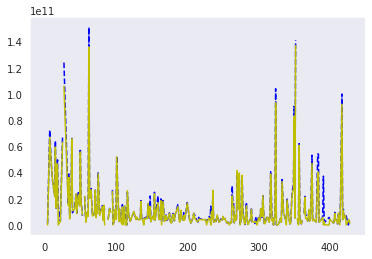

In [ ]:
## col_1, col_2 
x1 = np.array(train_col_1['inst_id'])
y1 = np.array(train_col_1['revenue1'])

x2 = np.array(train_col_2['inst_id'])
y2 = np.array(train_col_2['revenue2'])
plt.plot(x1, y1, 'b--', x2, y2, 'y-');

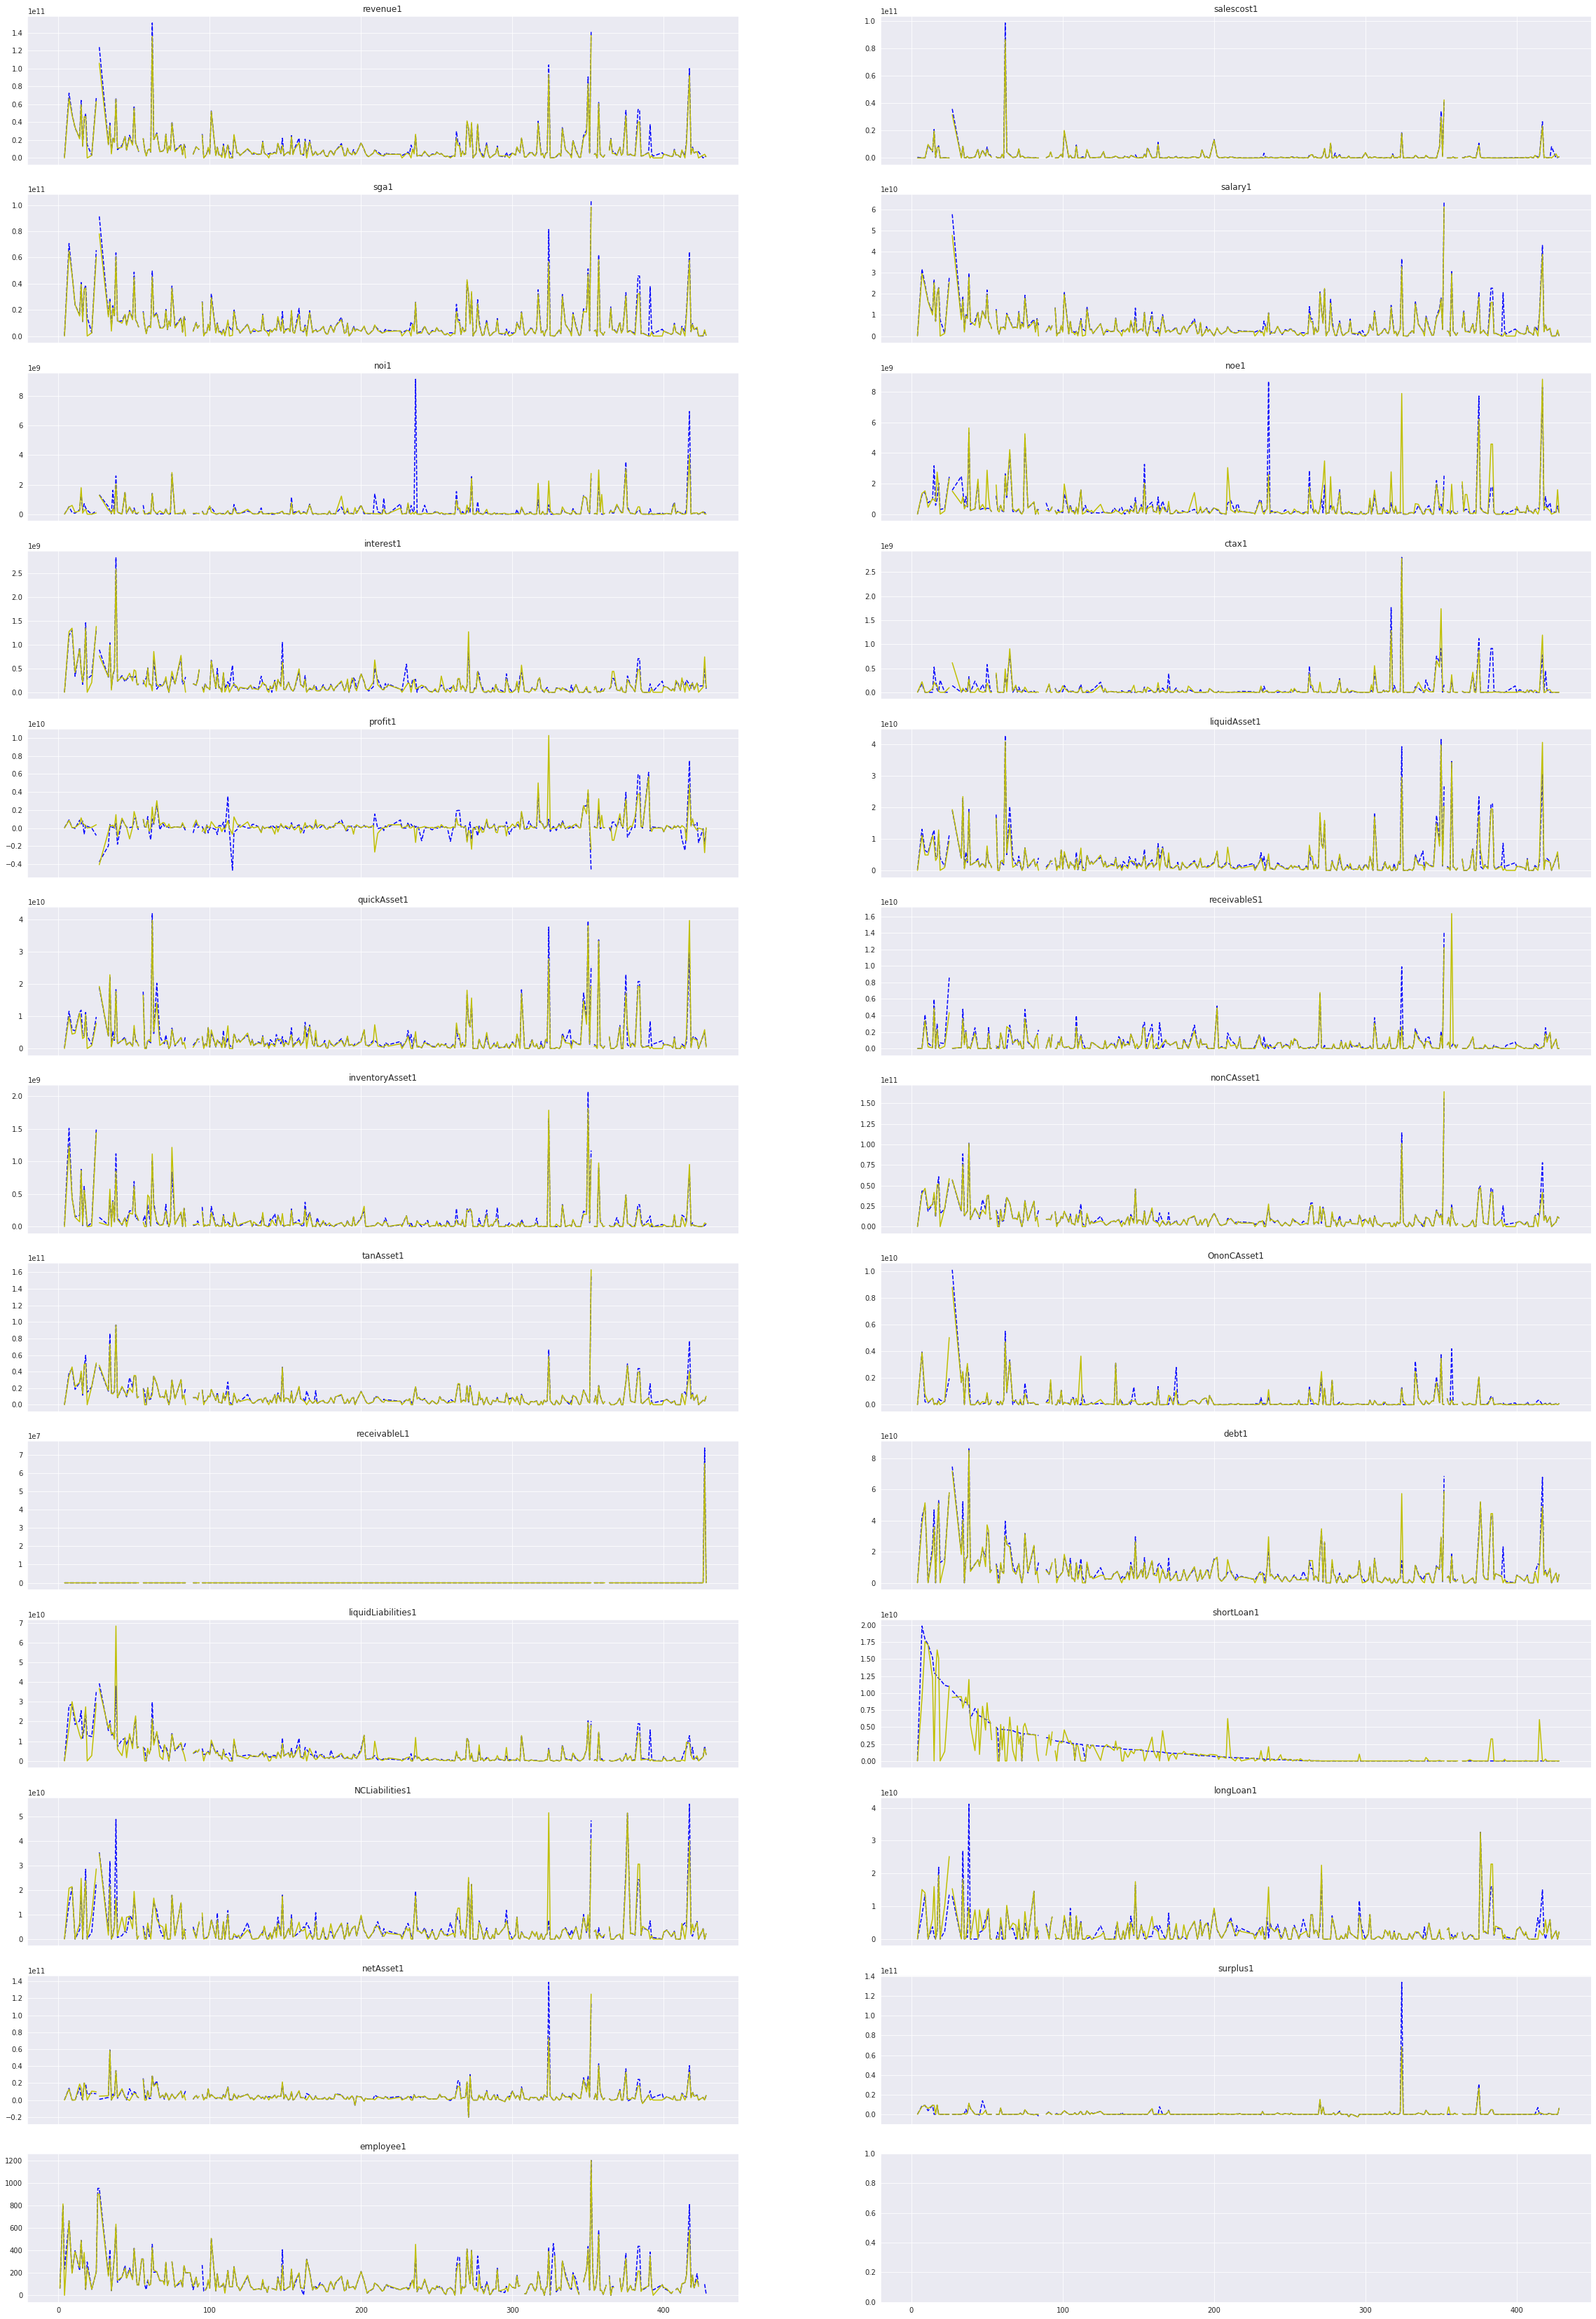

In [ ]:
## subplot (25개) 
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows= 13, ncols = 2, sharex = True, figsize = (40,60))  #fig:전체 subplot, axes: 낱개
ax = axes.flatten()  #ax를 2차원(3,2)이 아니라 1차원[0]으로 받고 싶을 때, 먄약 ncols = 1이면 안써도 무방
#plt.subplot(2,1,1) : subplot은 하나의 값(ax)만 받음
x1 = train_col_1['inst_id']

for i in range(len(col_1)):
    y1 = np.array(train_col_1[col_1[i]])
    y2 = np.array(train_col_2[col_2[i]])

    ax[i].plot(x1, y1, 'b--', x1, y2, 'y-')
    ax[i].set_title(f'{col_1[i]}')
    
plt.show();

## feature engineering
1. revenue - salescost = tot_profit(매출총이익)
2. (tot_profit/revenue)*100 = rat_profit(매출총이익률)
3. revenue - salescost - sga - salary = ope_profit(영업이익)
4. profit(당기순이익)
5. profit/netAsset = ROE
6. Debt + netAsset = tot_asset(총자산)
7. netAsset(순자산)
8. employee1/employee2 * 100 = 직원수 변동  or 직원수 (절대) 규모
9. ownerChnage

### 결측치 보간(imputer)
- 

In [ ]:
cat_col = ['sido','ownerChange','instkind' ]
num_col = [ 'bedCount', 'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee1', 'employee2']

In [ ]:
# 결측치 보간
imputer_num = SimpleImputer(strategy = 'mean')
imputer_cat = SimpleImputer(strategy = 'most_frequent')
train[num_col] = imputer_num.fit_transform(train[num_col])
test[num_col] = imputer_num.transform(test[num_col])
train[cat_col] = imputer_cat.fit_transform(train[cat_col])
test[cat_col] = imputer_cat.transform(test[cat_col])

In [ ]:
train.isnull().sum()
test.isnull().sum()

inst_id          0
OC             126
sido             0
sgg              0
openDate         0
              ... 
ownerChange      0
opendate         0
open_year        0
base             0
duration         0
Length: 62, dtype: int64

In [ ]:
train.describe()

,inst_id,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,target,open_year,base,duration
count,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00,301.00
mean,219.06,81.04,144.25,12881747447.99,2014902794.59,10332439064.09,5654114566.90,269615124.57,511587022.57,186896557.27,78473220.78,210170013.40,3536586531.43,3414761591.75,697586157.96,115453344.05,11406727757.46,10534082118.15,340650296.67,251680.24,8765309695.37,4352924983.20,1758237408.65,4583473025.00,2646563537.79,5938212711.98,1265934904.06,11709054481.61,1842095257.74,9203487186.56,5023229977.34,222381267.86,561766892.66,173635978.89,68322593.34,256343936.62,3222852351.53,3106104321.46,610306968.80,106366730.83,10452140878.21,9651555200.27,323292139.29,222670.00,8146026488.79,3860583593.41,1510050431.99,4471247363.88,2709978815.42,5273919018.09,978627865.26,142.75,134.80,0.95,2004.95,2017.00,12.05
std,121.23,50.97,118.56,20161119915.17,7360128254.00,14738331753.80,7974836367.55,791599558.41,1046145331.35,270189561.94,245273022.18,1119442115.78,6201615539.28,6011784545.24,1435796232.55,251744945.40,16875549132.11,15533895943.01,923374630.54,4250242.66,12688480432.78,6387355094.95,3151658032.02,7742189264.69,4634466337.43,12490406747.73,8137600081.21,18695604877.56,6653647983.69,13344107358.82,7307108686.54,520383287.67,1106796694.51,265773284.82,239591339.04,1097036508.53,5935002761.05,5745008613.27,1435714207.77,245667378.84,16273957870.85,15013640159.76,866643927.93,3760333.10,12389424008.79,6705999807.38,2913767335.04,7556762613.45,4502736533.34,10667451751.60,4625858152.25,157.36,147.44,0.22,8.89,0.00,8.89
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4696700774.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-20196244362.00,-2914969563.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4064822885.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-20147802018.00,-2781506722.00,1.00,1.00,0.00,1978.00,2017.00,0.00
25%,112.00,37.00,52.00,3279139204.00,0.00,2851076112.00,1644365564.00,8299316.00,82605287.00,52151874.00,0.00,0.00,748620856.00,714381650.00,72036.00,4578000.00,3043794830.00,2749986147.00,1195000.00,0.00,2029169902.00,527837917.00,0.00,482214156.00,0.00,1300622823.00,0.00,2761940747.00,0.00,2286048968.00,1383393305.00,7767695.00,66394644.00,32925976.00,0.00,0.00,495580208.00,455148089.00,0.00,2900100.00,2548114776.00,2441108501.00,0.00,0.00,1331305041.00,305331835.00,0.00,27152953.00,0.00,1024858271.00,0.00,54.00,56.00,1.00,2001.00,2017.00,6.00
50%,230.00,75.00,134.00,5676235498.00,229210064.00,4888397798.00,2717990950.00,48805311.00,191220890.00,112061304.00,1633010.00,93533600.00,1547334221.00,1500981186.00,240175801.00,25863183.00,6600751122.00,5713886520.00,38139000.00,0.00,4719856486.00,1914508183.00,290167960.00,2200000000.00,1390000000.00,3158831443.00,0.00,5075439045.00,181699815.00,4243365969.00,2485998016.00,47151898.00,180592251.00,96722996.00,1459540.00,108252037.00,1345479066.00,1287618300.00,128808910.00,25326910.00,5823203796.00,5272919636.00,30000000.00,0.00,3960636535.00,1524426255.00,180000000.00,2057542874.00,1216840000.00,2975298863.00,0.00,84.00,80.00,1.00,2007.00,2017.00,10.00
75%,321.0

In [ ]:
## comeback! : feature engineering 결과 -> inf/-inf 데이터 확인 
train.iloc[[77]]  ## 비용 데이터만 있고 매출 데이터는 없음  => 삭제 

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,target,opendate,open_year,base,duration
77,115,open,incheon,139,20160905,162.00,nursing_hospital,0.00,265274943.00,3842204420.00,2421379210.00,5907393.00,571739774.00,568306683.00,0.00,-4673311744.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,574646193.00,447422650.00,148647.00,129858994.00,127259404.00,0.00,-704356540.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,78.00,78.00,same,1,2016-09-05,2016,2017,1


In [ ]:
train.drop(index = 77, axis = 0, inplace = True)

In [ ]:
def feature_engineering(dataframe):

    df = dataframe.copy()

    # 매출총이익
    df['tot_profit1'] = df['revenue1'] - df['salescost1']  
    df['tot_profit2'] = df['revenue2'] - df['salescost2'] 

    # 매출총이익률 = 매출총이익/매출액
    df['rat_profit1'] = (df['tot_profit1']/df['revenue1']+1) * 100
    df['rat_profit2'] = (df['tot_profit2']/df['revenue2']+1) * 100

    # 영업이익
    df['ope_profit1'] = df['revenue1'] - df['salescost1'] - df['sga1'] - df['salary1']
    df['ope_profit2'] = df['revenue2'] - df['salescost2'] - df['sga2'] - df['salary2']

    # 당기순이익(profit1, profit2)

    # 순자산(netAsset1, netAsset2)

    # ROE = 당기순이익/순자산
    df['ROE1'] = df['profit1']/(df['netAsset1']+1) * 100
    df['ROE2'] = df['profit2']/(df['netAsset2']+1) * 100

    # 총자산 = 부채 + 자본
    df['tot_asset1'] = df['debt1'] + df['netAsset1']
    df['tot_asset2'] = df['debt2'] + df['netAsset2']

    # 부채비율 = 부채/총자산
    df['debt_ratio1'] = df['debt1']/df['tot_asset1'] * 100
    df['debt_ratio2'] = df['debt2']/df['tot_asset2'] * 100

    # ROA = 당기순이익/총자산
    df['ROA1'] = df['profit1']/(df['tot_asset1']+1) * 100
    df['ROA2'] = df['profit2']/(df['tot_asset1']+1) * 100

    # 직원수 
    ## 타입 변경
    if df['employee1'].dtype == 'object':
        df['employee1'] = df['employee1'].fillna(-1).str.replace(',','').astype(float).replace(-1, 'np.nan')    ### str.replace !!!!
        df['employee2'] = df['employee2'].fillna(-1).str.replace(',','').astype(float).replace(-1, 'np.nan')

    # 2016대비 2017 변화율
    df['delta_employee'] = (df['employee1']/(df['employee2']+0.1)) * 100
    df['delta_tot_profit'] = (df['tot_profit1']/(df['tot_profit2']+1)) * 100
    df['delta_rat_profit'] = (df['rat_profit1']/(df['rat_profit2']+1)) 
    df['delta_ope_profit'] = (df['ope_profit1']/(df['ope_profit2']+1)) * 100
    df['delta_ROE'] = (df['ROE1']/(df['ROE2']+1))
    df['delta_tot_asset'] = (df['tot_asset1']/(df['tot_asset2']+1)) * 100

    # ownerchange

    # 최종 사용 칼럼
    col = ['inst_id' ,'sido', 'bedCount', 'instkind',
           'tot_profit1', 'tot_profit2', 'rat_profit1','rat_profit2',
           'ope_profit1', 'ope_profit2', 'profit1', 'profit2', 'netAsset1', 'netAsset2', 
           'ROE1', 'ROE2', 'tot_asset1', 'tot_asset2','debt_ratio1', 'debt_ratio2', 'ROA1', 'ROA2',
           'delta_employee', 'delta_tot_profit', 'delta_rat_profit','delta_ope_profit', 'delta_ROE', 'delta_tot_asset','ownerChange','OC']
    
    df_new = df[col]
    return df_new

In [ ]:
train_df = feature_engineering(train)
test_df = feature_engineering(test)
#train_df.head(3).T

### 결측치 보완 again!
- 모델 예측 과정에서 오류 발생 (nan, inf 값 존재) => 변경 칼럼에 대해 다시 한 번 imputation 진행

In [ ]:

num_col = ['bedCount', 'tot_profit1', 'tot_profit2', 'rat_profit1',
       'rat_profit2', 'ope_profit1', 'ope_profit2', 'profit1', 'profit2',
       'netAsset1', 'netAsset2', 'ROE1', 'ROE2', 'tot_asset1', 'tot_asset2',
       'debt_ratio1', 'debt_ratio2', 'ROA1', 'ROA2', 'delta_employee',
       'delta_tot_profit', 'delta_rat_profit', 'delta_ope_profit', 'delta_ROE',
       'delta_tot_asset']
cat_col = ['sido', 'instkind', 'ownerChange']


In [ ]:
# 결측치 보간
imputer_num = SimpleImputer(strategy = 'mean')
imputer_cat = SimpleImputer(strategy = 'most_frequent')
train_df[num_col] = imputer_num.fit_transform(train_df[num_col])
test_df[num_col] = imputer_num.transform(test_df[num_col])
train_df[cat_col] = imputer_cat.fit_transform(train_df[cat_col])
test_df[cat_col] = imputer_cat.transform(test_df[cat_col])

In [ ]:
train_df.columns

Index(['inst_id', 'sido', 'bedCount', 'instkind', 'tot_profit1', 'tot_profit2',
       'rat_profit1', 'rat_profit2', 'ope_profit1', 'ope_profit2', 'profit1',
       'profit2', 'netAsset1', 'netAsset2', 'ROE1', 'ROE2', 'tot_asset1',
       'tot_asset2', 'debt_ratio1', 'debt_ratio2', 'ROA1', 'ROA2',
       'delta_employee', 'delta_tot_profit', 'delta_rat_profit',
       'delta_ope_profit', 'delta_ROE', 'delta_tot_asset', 'ownerChange',
       'OC'],
      dtype='object')

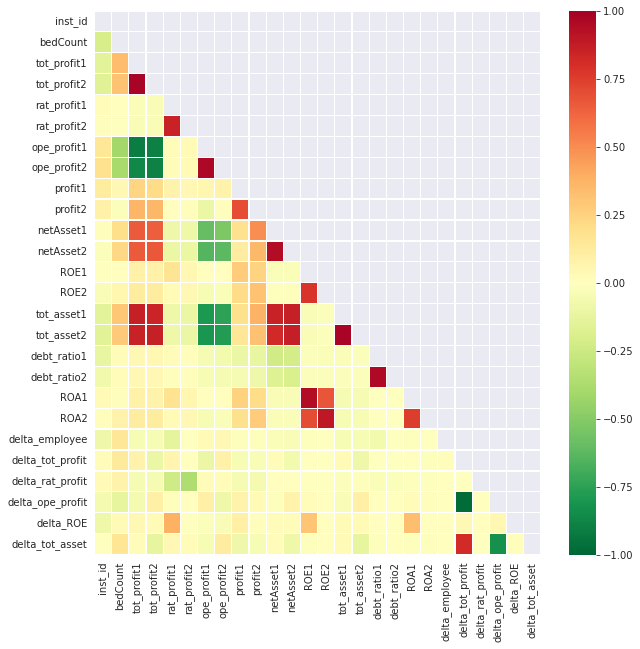

In [ ]:
mask = np.zeros_like(train_df.corr().abs(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,10))
sns.heatmap(train_df.corr(), 
            mask = mask, cmap='RdYlGn_r', 
            linewidths= 0.25, vmin = -1, vmax = 1)

In [ ]:
## new_feature pairplot
#sns.pairplot(train_df[train_df.columns[6:-1]])  #tot_profit - netasset

## train/validation/test data split

In [ ]:
target = 'OC'

train, val = train_test_split(train_df, train_size = 0.7, test_size = 0.3, 
                              stratify = train_df[target], random_state = 42)

train.shape, val.shape, test_df.shape

((210, 30), (90, 30), (126, 30))

In [ ]:
## target 변수 정수로 변환
def target_to_num(df):
    df['target'] = df['OC'].map({'open':1, 'close':0})
    return df

train = target_to_num(train)
val = target_to_num(val)

In [ ]:
#train.target.value_counts(), val.target.value_counts()

In [ ]:
X_train = train.drop(columns = ['OC','target'])
y_train = train['target']
X_val = val.drop(columns = ['OC','target'])
y_val = val['target']
X_test = test_df.drop(columns = ['OC'])

X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((210, 29), (90, 29), (210,), (90,), (126, 29))

In [ ]:
# model predict 과정에서 에러 발생 -> stackoverflow 
# First, replace all infinity values with nan
#X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_train.fillna(0, inplace=True)

#X_val.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_val.fillna(0, inplace=True)

# You'll probably want to repeat the same for X_Test
#X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
#X_test.fillna(0, inplace=True)

## 모델 학습
* classifier(-/+ oversampling) 성능 비교
* ensemble 기법으로 평균값으로 test_label 생성
* ~~hyperparameter tuning~~

    - logistic_regression
    - support_vector_machine(SVM)
    - decisiontree_classifier
    - randomforest_classifier
    - SGD_classifier
    - KNeighborsClassifier
    - GradientBoostingClassifier
    - XGBoost

In [ ]:
## 카테고리형 칼럼 인코딩 
preprocessor = make_column_transformer(
    (OrdinalEncoder(), ['instkind']),
    (OneHotEncoder(), ['ownerChange']),
    (TargetEncoder(), ['sido']))


## 모델 파이프라인(base)
logit_pipe = make_pipeline(preprocessor, LogisticRegression(
                                        n_jobs = -1, class_weight = 'balanced', random_state = 42))
svc_pipe = make_pipeline(preprocessor, SVC(
                                    class_weight = 'balanced', random_state=42 , probability = True))
dt_pipe = make_pipeline(preprocessor, DecisionTreeClassifier(
                                    class_weight = 'balanced', random_state=42, criterion='entropy'))
rf_pipe = make_pipeline(preprocessor, RandomForestClassifier(
                                    class_weight = 'balanced', random_state=42, criterion='entropy'))
sgd_pipe = make_pipeline(preprocessor, SGDClassifier(
                                    class_weight = 'balanced', random_state = 42))
knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier())
gbm_pipe = make_pipeline(preprocessor, GradientBoostingClassifier(random_state = 42))
xgb_pipe = make_pipeline(preprocessor, XGBClassifier(random_state = 42))


## pipe
pipe = [logit_pipe, svc_pipe, dt_pipe, rf_pipe, sgd_pipe, knn_pipe, gbm_pipe, xgb_pipe]

## 모델링 함수
def modeling(pipe, X_train, y_train, X_val, y_val, X_test):

    #train
    pipe.fit(X_train, y_train)
    print(f"train_sets' accuracy : {pipe.score(X_train, y_train)}")
    print(f"validation_sets' accuracy : {pipe.score(X_val, y_val)}")

    # classification report
    y_val_pred = pipe.predict(X_val)
    print("------"*15)
    print(f"<<model: {pipe.steps[1][0]}>> \n {classification_report(y_val, y_val_pred)}")
    print("======"*15)
    
    #test
    y_test_pred = pipe.predict(X_test)
    #y_pred = pd.DataFrame(y_test_pred ,columns = [f'{str(pipe)[:-5]}'])
    #return y_pred 


In [ ]:
for pi in pipe:
    modeling(pi, X_train, y_train, X_val, y_val, X_test)

train_sets' accuracy : 0.8952380952380953
validation_sets' accuracy : 0.7444444444444445
------------------------------------------------------------------------------------------
<<model: logisticregression>> 
               precision    recall  f1-score   support

           0       0.05      0.20      0.08         5
           1       0.94      0.78      0.85        85

    accuracy                           0.74        90
   macro avg       0.50      0.49      0.47        90
weighted avg       0.89      0.74      0.81        90

train_sets' accuracy : 0.8952380952380953
validation_sets' accuracy : 0.7444444444444445
------------------------------------------------------------------------------------------
<<model: svc>> 
               precision    recall  f1-score   support

           0       0.05      0.20      0.08         5
           1       0.94      0.78      0.85        85

    accuracy                           0.74        90
   macro avg       0.50      0.49      0.47   

In [ ]:
## 모델 파이프라인(+SMOTE -class_weight = 'balanced')
logit_pipe = make_pipeline(preprocessor, SMOTE(random_state = 42), LogisticRegression(n_jobs = -1,  random_state = 42))
svc_pipe = make_pipeline(preprocessor, SMOTE(random_state = 42), SVC(random_state=42 , probability = True))
dt_pipe = make_pipeline(preprocessor, SMOTE(random_state = 42), DecisionTreeClassifier(random_state=42, criterion='entropy'))
rf_pipe = make_pipeline(preprocessor, SMOTE(random_state = 42), RandomForestClassifier(random_state=42, criterion='entropy'))
sgd_pipe = make_pipeline(preprocessor, SMOTE(random_state = 42), SGDClassifier(random_state = 42))
knn_pipe = make_pipeline(preprocessor, SMOTE(random_state = 42), KNeighborsClassifier())
gbm_pipe = make_pipeline(preprocessor, SMOTE(random_state = 42), GradientBoostingClassifier(random_state = 42))
xgb_pipe = make_pipeline(preprocessor, SMOTE(random_state = 42), XGBClassifier(random_state = 42))

## pipe
pipe = [logit_pipe, svc_pipe, dt_pipe, rf_pipe, sgd_pipe, knn_pipe, gbm_pipe, xgb_pipe]

## 모델링 함수
def modeling(pipe, X_train, y_train, X_val, y_val, X_test):

    #train
    pipe.fit(X_train, y_train)
    print(f"train_sets' accuracy : {pipe.score(X_train, y_train)}")
    print(f"validation_sets' accuracy : {pipe.score(X_val, y_val)}")

    # classification report
    y_val_pred = pipe.predict(X_val)
    print("------"*15)
    print(f"<<model: {pipe.steps[2][0]}>> \n {classification_report(y_val, y_val_pred)}")
    print("======"*15)
    
    # ROC-curve
    #y_val_pred_proba = pipe.predict_proba(X_val)[:, 0]  # target : class = 0 인 경우
    #fpr, tpr, threshold = roc_curve(y_val, y_val_pred_proba)  # sgd :loss = hinge -> proba X
    
    # threshold optimize!
    #optimal_idx = np.argmax(tpr-fpr)
    #optimal_threshold = threshold[optimal_idx]
    #print(f"idx: {optimal_idx}, threshold:{optimal_threshold}")

    #auc_score = roc_auc_score(y_val, y_val_pred_proba)
    #print(f"auc score: {auc_score}")

    #test
    y_test_pred = pipe.predict(X_test)
    #y_pred = pd.DataFrame(y_test_pred ,columns = [f'{str(pipe)[:-5]}'])
    #return y_pred 

for pi in pipe:
    modeling(pi, X_train, y_train, X_val, y_val, X_test)

train_sets' accuracy : 0.8666666666666667
validation_sets' accuracy : 0.6666666666666666
------------------------------------------------------------------------------------------
<<model: logisticregression>> 
               precision    recall  f1-score   support

           0       0.04      0.20      0.06         5
           1       0.94      0.69      0.80        85

    accuracy                           0.67        90
   macro avg       0.49      0.45      0.43        90
weighted avg       0.89      0.67      0.76        90

train_sets' accuracy : 0.6428571428571429
validation_sets' accuracy : 0.5222222222222223
------------------------------------------------------------------------------------------
<<model: svc>> 
               precision    recall  f1-score   support

           0       0.07      0.60      0.12         5
           1       0.96      0.52      0.67        85

    accuracy                           0.52        90
   macro avg       0.51      0.56      0.40   

In [ ]:
# + ADASYN
logit_pipe = make_pipeline(preprocessor, ADASYN(), LogisticRegression(class_weight = 'balanced', n_jobs = -1,  random_state = 42))
svc_pipe = make_pipeline(preprocessor, ADASYN(), SVC(class_weight = 'balanced',random_state=42 , probability = True))
dt_pipe = make_pipeline(preprocessor, ADASYN(), DecisionTreeClassifier(class_weight = 'balanced',random_state=42, criterion='entropy'))
rf_pipe = make_pipeline(preprocessor, ADASYN(), RandomForestClassifier(class_weight = 'balanced',random_state=42, criterion='entropy'))
sgd_pipe = make_pipeline(preprocessor, ADASYN(), SGDClassifier(class_weight = 'balanced',random_state = 42))
knn_pipe = make_pipeline(preprocessor, ADASYN(), KNeighborsClassifier())
gbm_pipe = make_pipeline(preprocessor, ADASYN(), GradientBoostingClassifier(random_state = 42))
xgb_pipe = make_pipeline(preprocessor, ADASYN(), XGBClassifier(random_state = 42))

for pi in pipe:
    modeling(pi, X_train, y_train, X_val, y_val, X_test)

train_sets' accuracy : 0.8666666666666667
validation_sets' accuracy : 0.6666666666666666
------------------------------------------------------------------------------------------
<<model: logisticregression>> 
               precision    recall  f1-score   support

           0       0.04      0.20      0.06         5
           1       0.94      0.69      0.80        85

    accuracy                           0.67        90
   macro avg       0.49      0.45      0.43        90
weighted avg       0.89      0.67      0.76        90

train_sets' accuracy : 0.6428571428571429
validation_sets' accuracy : 0.5222222222222223
------------------------------------------------------------------------------------------
<<model: svc>> 
               precision    recall  f1-score   support

           0       0.07      0.60      0.12         5
           1       0.96      0.52      0.67        85

    accuracy                           0.52        90
   macro avg       0.51      0.56      0.40   

### 예측결과 해석
- imbalanced data 임을 감안하여 "label class = 0" 인 값의 f1-score를 중심으로 살펴봄 
- oversampling(SMOTE or ADASYN) 적용 후 f1-score 증가
- tree계열(decisiontree, randomforest)과 boosting계열(gradientdescentboosting)이 상대적으로 높은 성능을 보임
- SMOTE, ADASYN 성능 차이 없음

------------------------------------------------------------------------------------------
<<model: randomforestclassifier>> 
               precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.95      0.95      0.95        85

    accuracy                           0.91        90
   macro avg       0.58      0.58      0.58        90
weighted avg       0.91      0.91      0.91        90



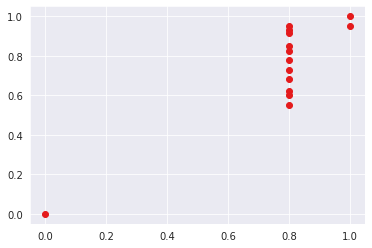

------------------------------------------------------------------------------------------
<<model: kneighborsclassifier>> 
               precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.95      0.93      0.94        85

    accuracy                           0.89        90
   macro avg       0.55      0.56      0.55        90
weighted avg       0.91      0.89      0.90        90



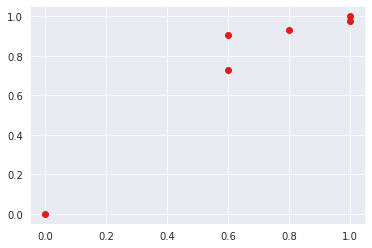

------------------------------------------------------------------------------------------
<<model: gradientboostingclassifier>> 
               precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.95      0.96      0.96        85

    accuracy                           0.92        90
   macro avg       0.60      0.58      0.59        90
weighted avg       0.91      0.92      0.92        90



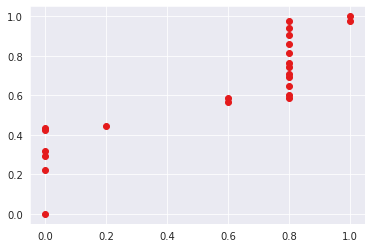

------------------------------------------------------------------------------------------
<<model: xgbclassifier>> 
               precision    recall  f1-score   support

           0       0.11      0.20      0.14         5
           1       0.95      0.91      0.93        85

    accuracy                           0.87        90
   macro avg       0.53      0.55      0.54        90
weighted avg       0.90      0.87      0.88        90



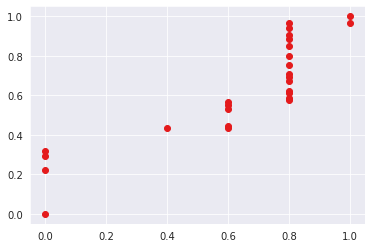

In [ ]:

rf_pipe = make_pipeline(preprocessor, SMOTE(random_state = 42), RandomForestClassifier(random_state=42, criterion='entropy'))
knn_pipe = make_pipeline(preprocessor, SMOTE(random_state = 42), KNeighborsClassifier())
gbm_pipe = make_pipeline(preprocessor, SMOTE(random_state = 42), GradientBoostingClassifier(random_state = 42))
xgb_pipe = make_pipeline(preprocessor, SMOTE(random_state = 42), XGBClassifier(random_state = 42))

## pipe
pipe = [rf_pipe, knn_pipe, gbm_pipe, xgb_pipe]

## 모델링 함수
def modeling(pipe, X_train, y_train, X_val, y_val, X_test):

    #train
    pipe.fit(X_train, y_train)
    #print(f"train_sets' accuracy : {pipe.score(X_train, y_train)}")
    #print(f"validation_sets' accuracy : {pipe.score(X_val, y_val)}")

    # classification report
    y_val_pred = pipe.predict(X_val)
    print("------"*15)
    print(f"<<model: {pipe.steps[2][0]}>> \n {classification_report(y_val, y_val_pred)}")
    
    
    # ROC-curve
    y_val_pred_proba = pipe.predict_proba(X_val)[:, 1]  
    fpr, tpr, threshold = roc_curve(y_val, y_val_pred_proba)  # sgd :loss = hinge -> proba X
    plt.scatter(fpr, tpr)
    plt.show()
    
    # threshold optimize!
    #optimal_idx = np.argmax(tpr-fpr)
    #optimal_threshold = threshold[optimal_idx]
    #print(f"idx: {optimal_idx}, threshold:{optimal_threshold}")

    #optimal_threshold = 0.99

    #y_val_pred_opt = (y_val_pred_proba >= optimal_threshold)
    #print(f"<<model: {pipe.steps[2][0]}>> \n {classification_report(y_val, y_val_pred_opt)}")

    #auc_score = roc_auc_score(y_val, y_val_pred_proba)
    #print(f"auc score: {auc_score}")
    #print("======"*15)

    #test
    #y_test_pred = pipe.predict(X_test)
    #y_pred = pd.DataFrame(y_test_pred ,columns = [f'{str(pipe)[:-5]}'])
    #return y_pred 

for pi in pipe:
    modeling(pi, X_train, y_train, X_val, y_val, X_test)


In [ ]:
rf_pipe.fit(X_train,y_train)
rf_pipe.predict(X_test)
y_pred_rf = rf_pipe.predict_proba(X_test)[:,1]

gbm_pipe.fit(X_train,y_train)
gbm_pipe.predict(X_test)
y_pred_gbm = gbm_pipe.predict_proba(X_test)[:,1]

In [ ]:
y_pred = pd.DataFrame({'rf': y_pred_rf, 'gbm':y_pred_gbm})
y_pred['mean'] = (y_pred['rf']+ y_pred['gbm'])/2 
y_pred['ans'] = (y_pred['mean'] > 0.99).astype(int)
y_pred['ans'].value_counts()

1    72
0    54
Name: ans, dtype: int64

## 최종결과 및 한계

- 최종적으로 모델의 앙상블 기법(soft voting)을 사용해 예측값을 만들고자 계획함
- 하지만 낮은 성능, auc score와 roc 곡선의 모양 모두 비정상적인 모습을 보임
- 또한 optimal threshold를 찾고자 하였으나 모델별로 값이 상이하고(0.99, 0.002...) 값이 변화해도 성능면에서는 큰 차이를 보이지 않음
- 따라서 임의로 0.99의 threshold를 설정하여 분류
- test 정답이 없어 확인은 불가함
---
- 하이퍼파라미터 튜닝, CV 등의 방법 미사용
- 데이터 불균형 문제 해소를 위한 SMOTE 등의 방법이 적절했나 의문(성능 크게 향상 없음)
- 전처리 과정에 많은 시간을 투자하였으나 해당 가설이 유효했는지 다시 점검해야 함(특성 중요도 등 파악 필요)



##### trouble shooting 
* 문제 : 결측치 보완 후 feature engineering을 진행했음에도 불구하고 모델 predict 과정에서 하단의 오류 발생
```
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
```
* 해결 : 1) feature engineering 함수 적용 후 한 번 더 impute 진행 =>  2) pipeline의 encoder의 parameter 중 handling_ = 'ignore' 삭제 후 해결
